# Introduction
Hi there! Welcome to Madhu Bala Sankaralingam, Jasmine Anderson, Shariq Lalani's CIS 5450 final project from Fall 2023.

We are planning to study/analyze the leading causes of death using the datasets from WHO Mortality Database. The primary objective of this project is to analyze the mortality data to understand patterns and factors influencing death rates. By analyzing the data, we aim to gain insights into the leading causes of death. We'll walk you through the entire process by downloading and acquiring preliminary datasets, extracting features, conducting EDA, and doing feature importance with modeling.

Let's begin!

# User Authentication, Reading the datasets, Import Setup
Some of this code will require the user to have data in their private drive.
We utilized the below drive for much our analysis. You can access the files and modify your respective google drive paths if you wish to run this notebook

*   Click on this google drive [link for drive](https://drive.google.com/drive/folders/1nOv51BBbO2zRVqmKNz2ViXfW7DA30SQb).
*   Right click the "5450-Final Project Datasets", choose "MyDrive" and click "Add ShortCut".
*   After finishing your session, you may delete the "5450-Final Project Datasets" folder from the private google drive.
*   You will be prompted to sign-in to your drive.





















In [ ]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Libraries

In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px

### Dataset Descriptions





1. country_codes.csv - List of the country codes and the corresponding names
2. pop_csv - Births and population counts for each country
3. Causes_codes.csv - List of codes for causes of death and corresponding cause desciption
5. Morticd10_part5.csv - Mortalitity counts by country, gender and age groups for the year 2017- 2021



In [ ]:

mort_df = pd.read_csv('/content/drive/MyDrive/Morticd10_part5.csv')
country_codes_df = pd.read_csv('/content/drive/MyDrive/country_codes.csv')
pop_births_df = pd.read_csv('/content/drive/MyDrive/pop.csv')
causes_df = pd.read_csv('/content/drive/MyDrive/Causes_codes.csv')

<ipython-input-4-b87557f2e268>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  mort_df = pd.read_csv('/content/drive/MyDrive/Morticd10_part5.csv')


# Analysis of Population and Birth Dataset

In [ ]:
pop_births_df.head(5)

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,NaN,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,NaN,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0


### Preprocessing and cleaning the pop_births_df

Preprocessing and cleaning steps:

*   Filtering for years 2013 and greater
*   keeping and renaming only the necessary columns (Country, Year, Sex, Pop1, LB)
*   Converting columns with float dataype to integer
*   Filling any null values with 0
* Assigning Male and female to appriopate values in Sex column




In [ ]:
#Filtering for year 2013 and greater
pop_births_filtered = pop_births_df[(pop_births_df['Year'] <= 2020) & (pop_births_df['Year'] >= 2017)]
pop_births_filtered = pop_births_filtered[pop_births_df['Sex'] != 9]

#Keeping only necessary columns
pop_births_filtered = pop_births_filtered[['Country', 'Year', 'Sex', 'Pop1', 'Lb']]

#Joining country_codes_df to get country names, droping duplicate columns, and renaming columns
pop_births_filtered = pd.merge(pop_births_filtered, country_codes_df, left_on='Country', right_on='country', how='left')
pop_births_filtered = pop_births_filtered.drop(['Country', 'country'], axis=1)
pop_births_filtered = pop_births_filtered.rename(columns={'name': 'Country', 'Pop1': 'Population', 'Lb':'Births'})

#coverting columns with datatype float to integer, filling any null values with 0
columns_to_convert = ['Population', 'Births']
pop_births_filtered[columns_to_convert] = pop_births_filtered[columns_to_convert].fillna(0).astype('int')

#Assigning Male and female to values in Sex column
pop_births_filtered['Sex'] =pop_births_filtered['Sex'].apply(lambda x:'Male' if x==1 else 'Female')

pop_births_filtered.head()

<ipython-input-6-027d138f6eb4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pop_births_filtered = pop_births_filtered[pop_births_df['Sex'] != 9]


,Year,Sex,Population,Births,Country
0,2017,Male,49095021,1309488,Egypt
1,2017,Female,46107511,1247952,Egypt
2,2018,Male,50070213,1219500,Egypt
3,2018,Female,47077155,1162862,Egypt
4,2019,Male,50948133,0,Egypt


In [ ]:
#Computing summary statistics for Population and Births.
summary_stats = pop_births_filtered[['Population', 'Births']].describe()
summary_stats

,Population,Births
count,4.560000e+02,4.560000e+02
mean,1.051237e+07,1.095080e+05
std,1.630443e+07,2.083635e+05
min,1.636600e+04,0.000000e+00
25%,1.039860e+06,5.942750e+03
50%,2.929834e+06,2.990950e+04
75%,1.056032e+07,1.083795e+05
max,1.073868e+08,1.457003e+06


### Distribution of Population and Births

When looking at the distribution of population and births most countries fall in the same bin. Most countries have a smaller population and number of births compared to the few that have larger populations and number of births.

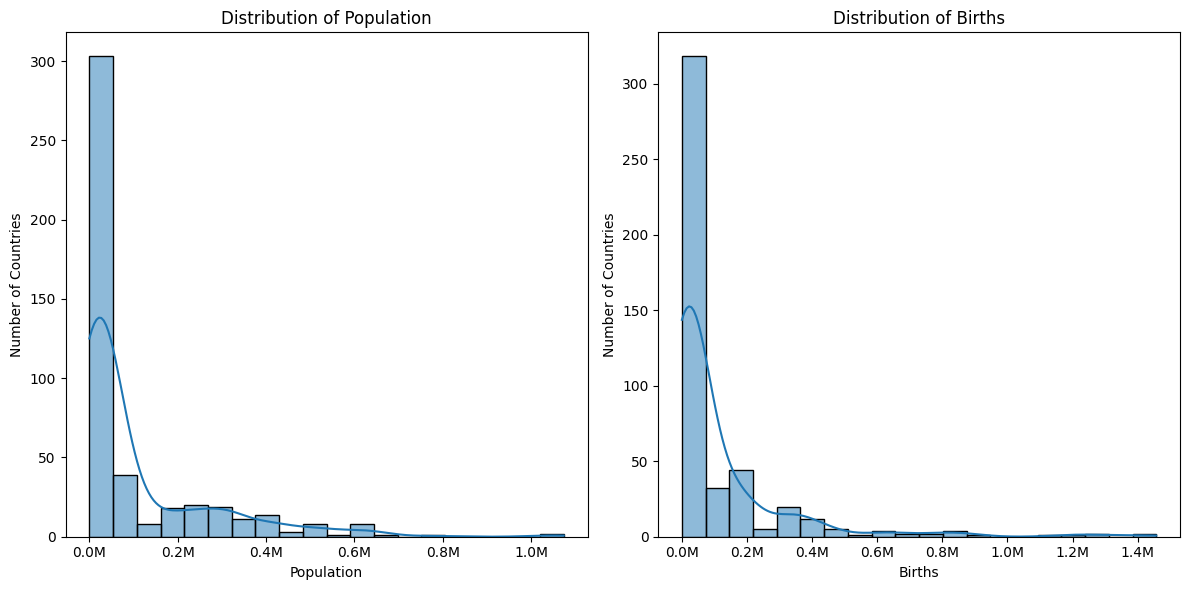

In [ ]:

def millions_formatter_le8(x,pos):
  return'{:.1f}M'.format(x/1e8)

def millions_formatter_le6(x,pos):
  return'{:.1f}M'.format(x/1e6)

plt.figure(figsize=(12,6))

# Histogram for Population
plt.subplot(1, 2, 1)
sns.histplot(pop_births_filtered['Population'], bins=20, kde=True)
plt.ylabel('Number of Countries')
plt.title('Distribution of Population')

formatter = FuncFormatter(millions_formatter_le8)
plt.gca().xaxis.set_major_formatter(formatter)

# Histogram for Births
plt.subplot(1, 2, 2)
sns.histplot(pop_births_filtered['Births'], bins=20, kde=True)
plt.ylabel('Number of Countries')
plt.title('Distribution of Births')

formatter = FuncFormatter(millions_formatter_le6)
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

### Population and Births Trends

The overall population and number of births world wide has declined with an increase in both population and and number of births in 2019.

Important factors:


*   In year 2020 the world faced the COVID-19 Pandemic. To date there has been over 6 million deaths caused by Covid
*   Some countries had null vaules for births, which were replaced with 0.



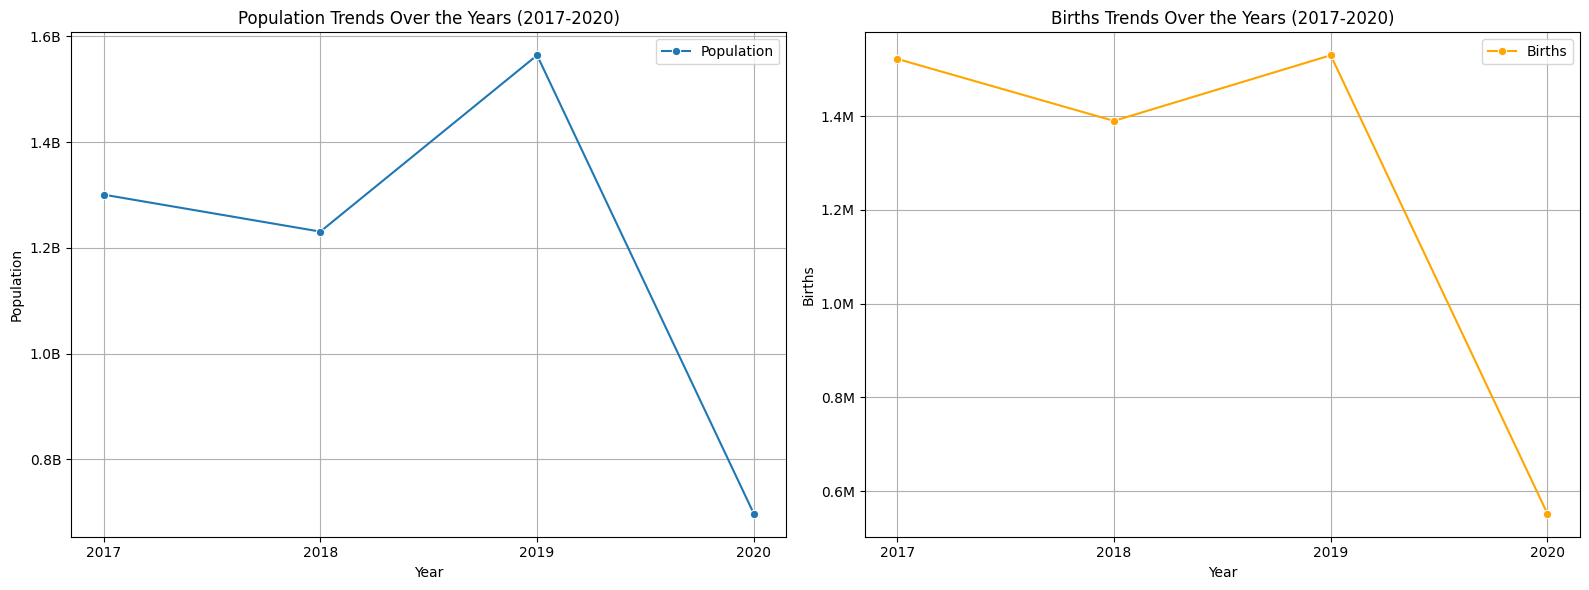

In [ ]:
def millions_formatter_le9(x,pos):
  return'{:.1f}B'.format(x/1e9)

def millions_formatter_le7(x,pos):
  return'{:.1f}M'.format(x/1e7)

yearly_trends = pop_births_filtered.groupby('Year')[['Population', 'Births']].sum().reset_index()

# Line plot for Population and Births over the years
plt.figure(figsize=(16, 6))

# Subplot 1: Line plot for Population over the years
plt.subplot(1, 2, 1)
Years = [2017, 2018, 2019, 2020]
sns.lineplot(data=yearly_trends, x='Year', y='Population', marker='o', label='Population')
plt.title('Population Trends Over the Years (2017-2020)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks(Years)
formatter = FuncFormatter(millions_formatter_le9)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)

# Subplot 2: Line plot for Births over the years
plt.subplot(1, 2, 2)
sns.lineplot(data=yearly_trends, x='Year', y='Births', marker='o', label='Births', color='orange')
plt.title('Births Trends Over the Years (2017-2020)')
plt.xlabel('Year')
plt.ylabel('Births')
plt.xticks(Years)
formatter = FuncFormatter(millions_formatter_le7)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Population and Birth Distribution by Sex

**Population Distribution by Sex:**



*   Females: Almost 2.5 billion
*   Males: Approximately 2 billion
* Slight gender imbalance, with a higher female population


**Births Distribution by Sex:**


*   Female Births: Nearly 2.4 million
*   Male Births: Around 2.5 million
* Slightly more male births, contributing to the observed gender imbalance



These trends suggest global demographic patterns with a higher number of females in the overall population and a slightly higher number of male births. Socio-economic and cultural factors may influence these distributions.

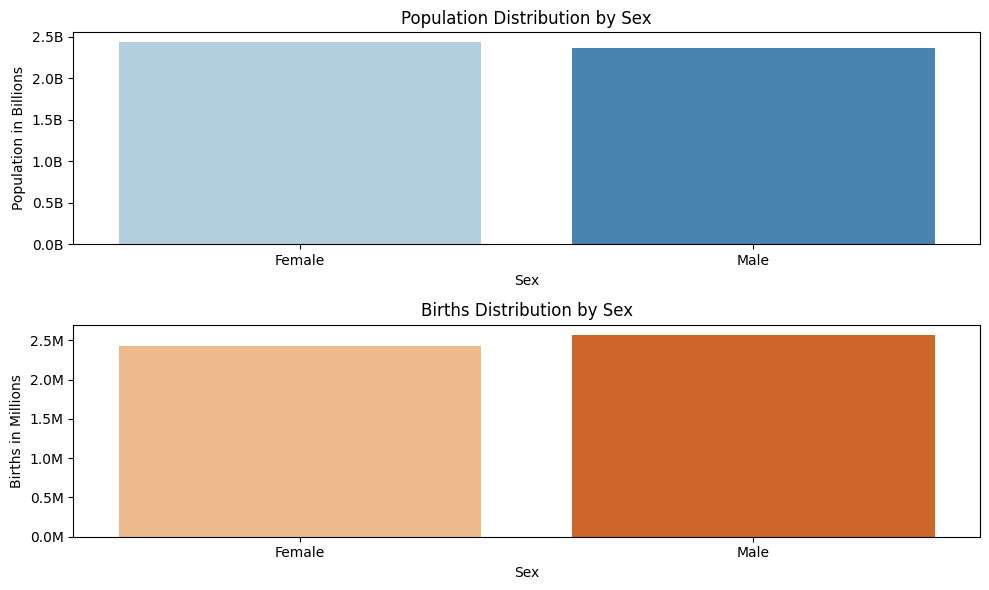

In [ ]:
sex_distribution = pop_births_filtered.groupby('Sex')[['Population', 'Births']].sum().reset_index()

# Bar plot for Population and Births by Sex
plt.figure(figsize=(10, 6))

# Bar plot for Population*
plt.subplot(2, 1, 1)
sns.barplot(data=sex_distribution, x='Sex', y='Population', palette='Blues')
plt.title('Population Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Population in Billions')
formatter = FuncFormatter(millions_formatter_le9)
plt.gca().yaxis.set_major_formatter(formatter)

# Bar plot for Births
plt.subplot(2, 1, 2)
sns.barplot(data=sex_distribution, x='Sex', y='Births', palette='Oranges')
plt.title('Births Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Births in Millions')
formatter = FuncFormatter(millions_formatter_le7)
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

## Population and Birth Rates

**Highest and Lowest Populations:**



*   Highest Population: Japan
*   Lowest Population: Monaco



**Highest and Lowest Birth Rates:**



*   Highest Birth Rate: Libyan Arab Jamahiriya
*   Lowest Birth Rate: Fiji


These results highlight significant variations in population sizes and birth rates across countries.These demographic insights offer valuable perspectives on global population dynamics and may reflect cultural, economic, and healthcare differences among nations.

In [ ]:
country_analysis = pop_births_filtered.groupby('Country')[['Population', 'Births']].sum().reset_index()


max_population_country = country_analysis.loc[country_analysis['Population'].idxmax()]['Country']
min_population_country = country_analysis.loc[country_analysis['Population'].idxmin()]['Country']

#Identify countries with the highest and lowest birth rates
country_analysis['BirthRate'] = country_analysis['Births'] / country_analysis['Population'] * 1000  # Adjust as needed
max_birth_rate_country = country_analysis.loc[country_analysis['BirthRate'].idxmax()]['Country']
min_birth_rate_country = country_analysis.loc[country_analysis['BirthRate'].idxmin()]['Country']

print("\nCountries with the Highest and Lowest Populations:")
print("Highest Population Country:", max_population_country)
print("Lowest Population Country:", min_population_country)

print("\nCountries with the Highest and Lowest Birth Rates:")
print("Highest Birth Rate Country:", max_birth_rate_country)
print("Lowest Birth Rate Country:", min_birth_rate_country)


Countries with the Highest and Lowest Populations:
Highest Population Country: Japan
Lowest Population Country: Monaco

Countries with the Highest and Lowest Birth Rates:
Highest Birth Rate Country: Libyan Arab Jamahiriya
Lowest Birth Rate Country: Fiji


The next two cells show the countries with the highest and lowest population for the years 2017-2020, respectively

In [ ]:
#removing rows with no births recorded
pop_births_filtered = pop_births_filtered[pop_births_filtered['Births'] > 0]

# Group by Year, Country, and calculate the sum of Population and Births for each year and country
yearly_country_analysis = pop_births_filtered.groupby(['Year', 'Country'])[['Population', 'Births']].sum().reset_index()

# Identify countries with the highest populations by year
max_population_by_year = yearly_country_analysis.loc[yearly_country_analysis.groupby('Year')['Population'].idxmax()]
max_population_by_year

,Year,Country,Population,Births
20,2017,Japan,124648471,946065
78,2018,Japan,124218285,918400
117,2019,Brazil,210147125,2848294
176,2020,Japan,123398962,840835


In [ ]:
# Identify countries with lowest populations by year
min_population_by_year = yearly_country_analysis.loc[yearly_country_analysis.groupby('Year')['Population'].idxmin()]
min_population_by_year

,Year,Country,Population,Births
42,2017,San Marino,33230,228
96,2018,San Marino,33366,235
147,2019,San Marino,33477,232
188,2020,San Marino,33615,224


The next two cells show the countries with the highest and lowest birth rates for the years 2017-2020, respectively

In [ ]:
# Identify countries with the highest and lowest birth rates by year
yearly_country_analysis['BirthRate'] = yearly_country_analysis['Births'] / yearly_country_analysis['Population'] * 1000
yearly_country_analysis['BirthRate'] = yearly_country_analysis['BirthRate'].round(2)
max_birth_rate_by_year = yearly_country_analysis.loc[yearly_country_analysis.groupby('Year')['BirthRate'].idxmax()]

max_birth_rate_by_year

,Year,Country,Population,Births,BirthRate
24,2017,Libyan Arab Jamahiriya,6570116,232595,35.40
87,2018,Occupied Palestinian Territory,2921170,74411,25.47
137,2019,Mongolia,3193760,78223,24.49
182,2020,Mongolia,3225151,76261,23.65


In [ ]:
min_birth_rate_by_year = yearly_country_analysis.loc[yearly_country_analysis.groupby('Year')['BirthRate'].idxmin()]
min_birth_rate_by_year['BirthRate'] = min_birth_rate_by_year['BirthRate'].round(2)
min_birth_rate_by_year

,Year,Country,Population,Births,BirthRate
42,2017,San Marino,33230,228,6.86
93,2018,Republic of Korea,51300880,326822,6.37
144,2019,Republic of Korea,51337424,302676,5.90
187,2020,Republic of Korea,51349258,272337,5.30


### Visualization of top 10 highest population and births by country for each year

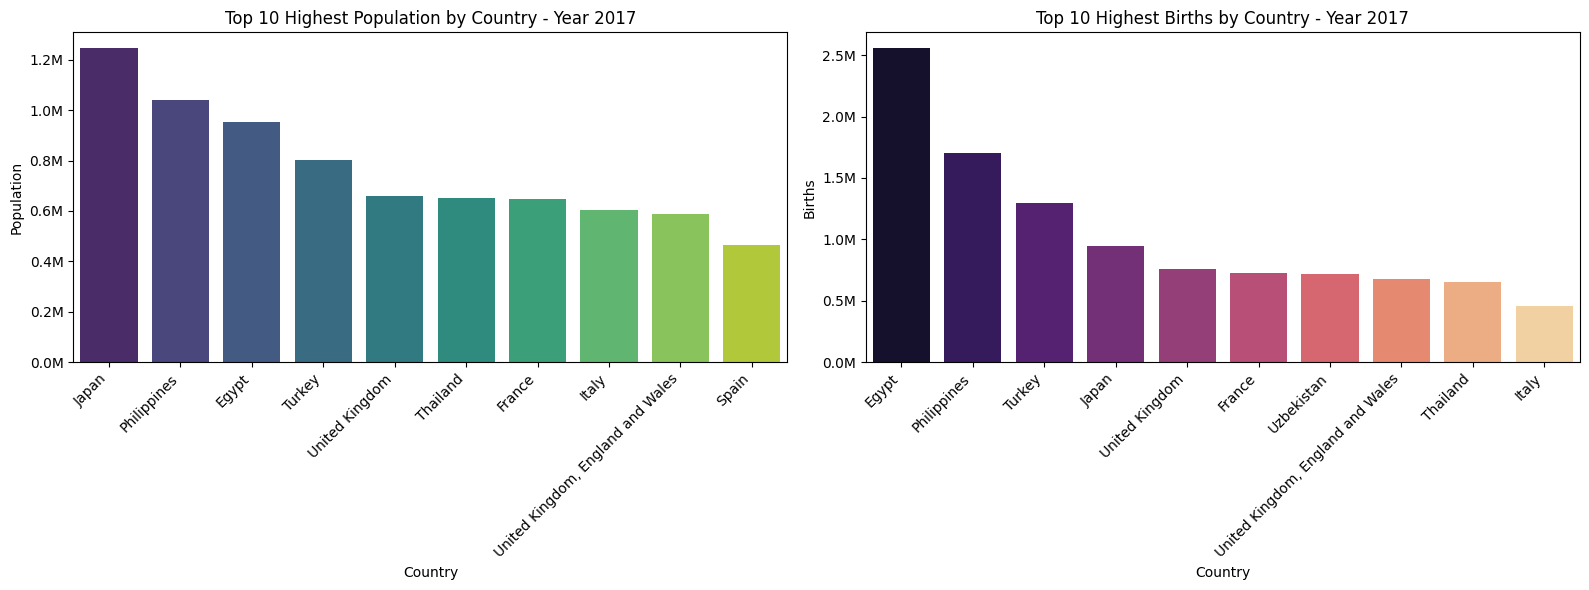

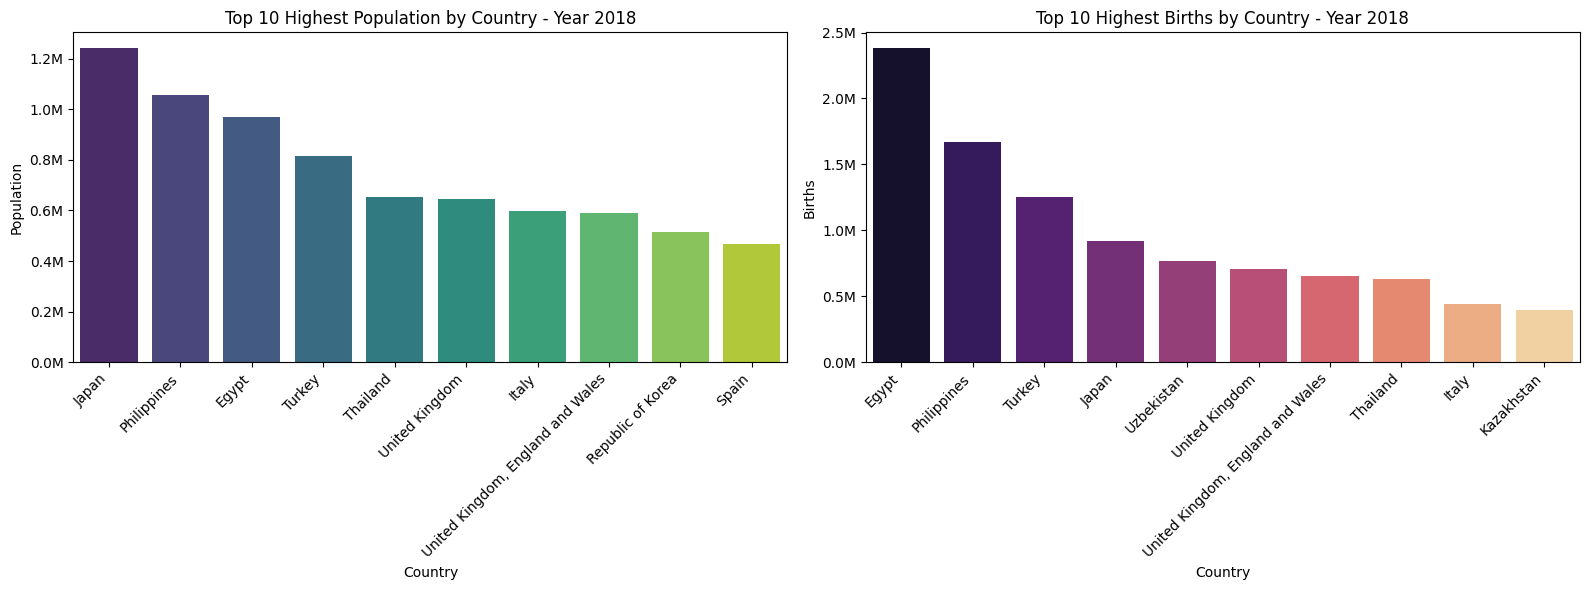

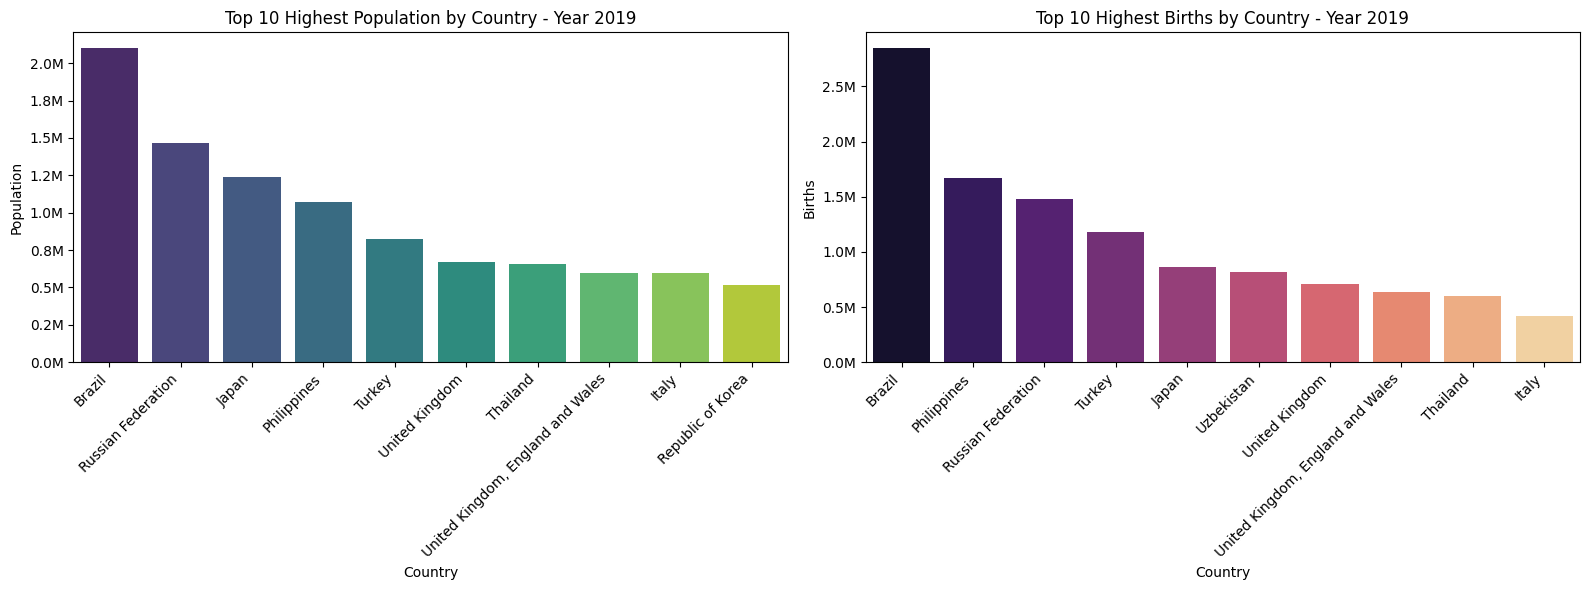

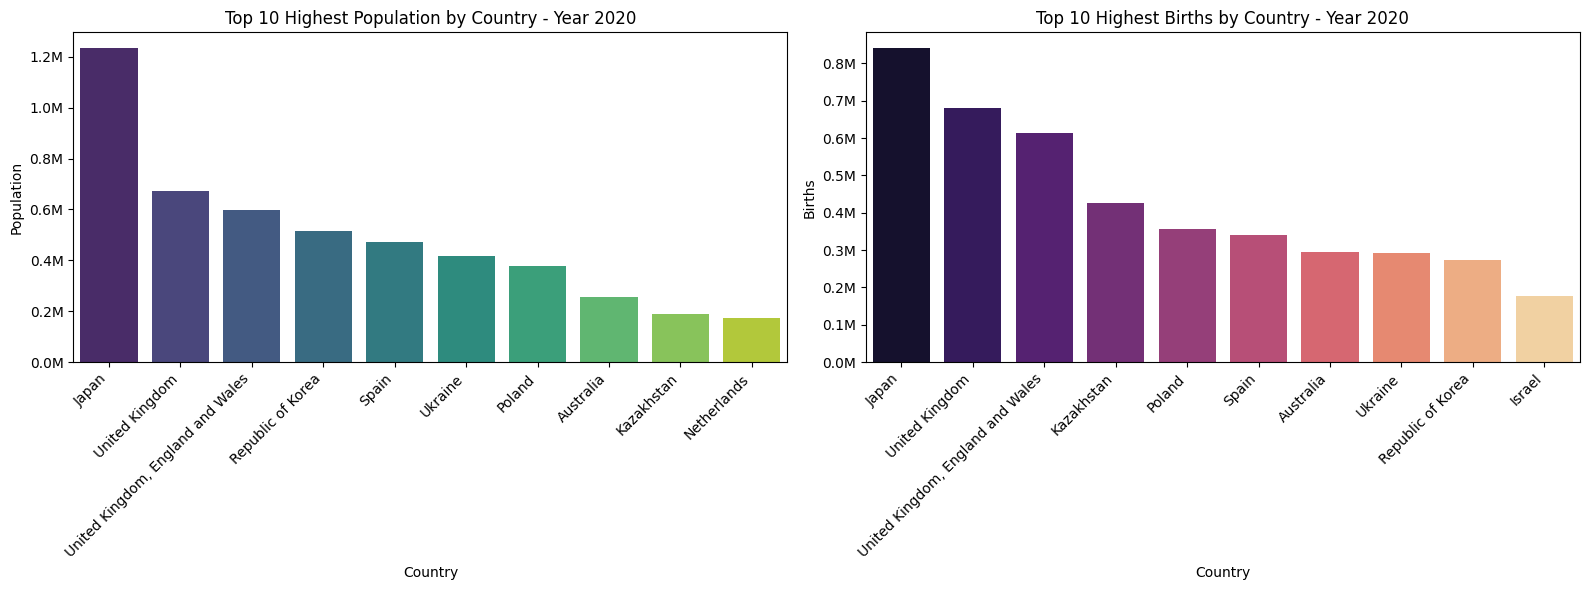

In [ ]:
# Plotting the top 10 highest for each year
for year in yearly_country_analysis['Year'].unique():
    subset = yearly_country_analysis[yearly_country_analysis['Year'] == year]

    # Sort by Population and Births
    subset_sorted_population = subset.sort_values(by='Population', ascending=False).head(10)
    subset_sorted_births = subset.sort_values(by='Births', ascending=False).head(10)

    # Set up subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Bar plot for Top 10 Highest Population by Country
    sns.barplot(data=subset_sorted_population, x='Country', y='Population', palette='viridis', ax=axes[0])
    axes[0].set_title(f'Top 10 Highest Population by Country - Year {year}')
    axes[0].set_xlabel('Country')
    axes[0].set_ylabel('Population')
    axes[0].set_xticklabels(subset_sorted_population['Country'], rotation=45, ha='right')  # Adjusted line
    formatter = FuncFormatter(millions_formatter_le8)
    axes[0].yaxis.set_major_formatter(formatter)

    # Bar plot for Top 10 Highest Births by Country
    sns.barplot(data=subset_sorted_births, x='Country', y='Births', palette='magma', ax=axes[1])
    axes[1].set_title(f'Top 10 Highest Births by Country - Year {year}')
    axes[1].set_xlabel('Country')
    axes[1].set_ylabel('Births')
    axes[1].set_xticklabels(subset_sorted_births['Country'], rotation=45, ha='right')  # Adjusted line
    formatter = FuncFormatter(millions_formatter_le6)
    axes[1].yaxis.set_major_formatter(formatter)


    plt.tight_layout()
    plt.show()

###Correlation Matrix

Assumably, the Correlation Matrix shows a direct correlation between Population and number of Births.

In [ ]:
correlation_matrix = yearly_country_analysis.corr()

<ipython-input-17-bc9b396aadcf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = yearly_country_analysis.corr()


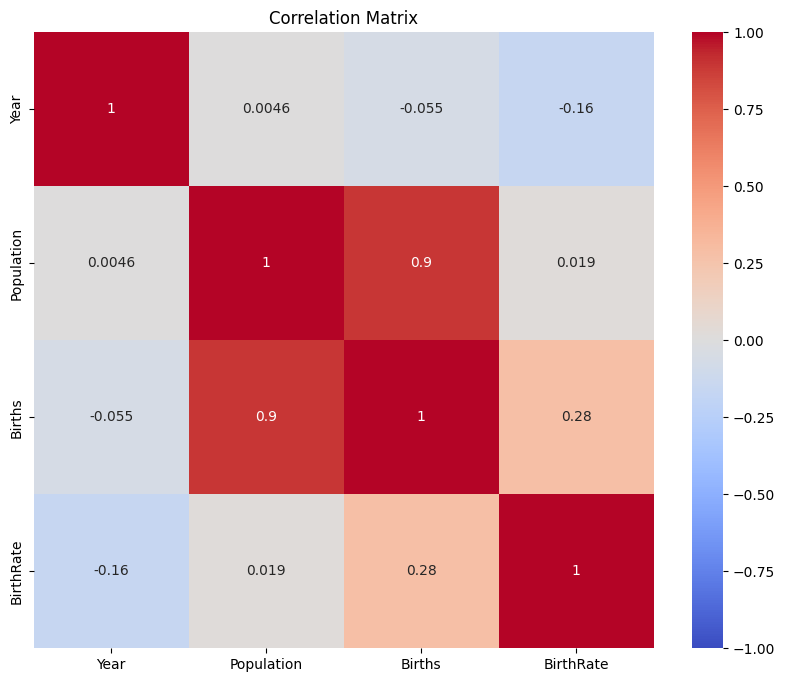

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

## Potential Impact that Population and Birth Rate can have on Death Rates

**Population Size Influence:**

Countries with higher populations, like Japan, might face different challenges related to healthcare infrastructure, disease management, and aging populations, potentially affecting death rates.

**Birth Rate Implications:**

High birth rates, as seen in Libyan Arab Jamahiriya, might strain healthcare systems and resources, impacting child and maternal mortality rates, and potentially influencing overall death rates.

**Low Birth Rates and Aging Populations:**

Countries with lower birth rates, such as Monaco and potentially Japan, may experience demographic challenges related to aging populations, potentially affecting healthcare demands and death rates, especially among the elderly.



These insights suggest a relationship between population size, birth rates, and potential implications for death rates. The specific impact will depend on various factors, including healthcare infrastructure, socio-economic conditions, and public health policies in each country.

#Analysis of Mortality Dataset

We will now do an analysis on mortality world wide and by Country for years 2017-2020. We will look at Countries with the highest number of deaths and death rate and the top causes for deaths.

### Preprocessing Mortality and Country Datasets

In [ ]:
mort_df.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,4303,NaN,NaN,2017,101,1000,1,1,8,281784,...,43174.0,29856.0,29184.0,NaN,NaN,68.0,1608.0,NaN,NaN,NaN
1,4303,NaN,NaN,2017,101,1000,2,1,8,292339,...,56037.0,52655.0,88271.0,NaN,NaN,19.0,1178.0,NaN,NaN,NaN
2,4303,NaN,NaN,2017,101,1001,1,1,8,6198,...,62.0,36.0,15.0,NaN,NaN,1.0,41.0,NaN,NaN,NaN
3,4303,NaN,NaN,2017,101,1001,2,1,8,2516,...,86.0,45.0,29.0,NaN,NaN,0.0,29.0,NaN,NaN,NaN
4,4303,NaN,NaN,2017,101,1002,1,1,8,0,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN


In [ ]:
mort_df.shape

(811508, 39)

###Combining the data
Merging and cleaning steps:



1.  Using mort_df, create a df called mort_df_filtered that contains the necessary columns by dropping Admin1, SubDiv, List
2.  After filtering mort_df_filtered to have the necessary columns, merge it on Country with the country_codes_df table to get the required country names





In [ ]:
# create a dataframe by joining country dataset with the ICD-10 dataset
mort_df_filtered = mort_df.drop(['Admin1', 'SubDiv', 'List'], axis=1)
mort_df_filtered = pd.merge(mort_df_filtered, country_codes_df, left_on='Country', right_on='country', how='inner')
#Keeping only the necessary columns
mort_df_filtered = mort_df_filtered.drop(['country','Country'], axis =1)
mort_df_filtered = mort_df_filtered.drop(['Frmat','IM_Frmat'], axis =1)

###Cleaning the mort_df_filtered
Preprocessing and cleaning steps:



1.   Filtering for years 2017 and greater
2.   Keeping and renaming only the necessary columns
3. Converting columns with float dataype to integer
4. Filling any null values with 0
5. Make columns- 'Deaths1' ,'Deaths2' , 'Deaths3' , 'Deaths4' , 'Deaths5' , 'Deaths6' , 'Deaths7','Deaths8' , 'Deaths9' , 'Deaths10' , 'Deaths11' , 'Deaths12' , 'Deaths13' , 'Deaths14' , 'Deaths15', 'Deaths16' , 'Deaths17' , 'Deaths18' , 'Deaths19' , 'Deaths20' , 'Deaths21' , 'Deaths22' , 'Deaths23',
'Deaths24' , 'Deaths25' , 'Deaths26' , 'IM_Deaths1' , 'IM_Deaths2' ,IM_Deaths3' , 'IM_Deaths4' to integer
6. Assigning male and female to appriopate values in 'Sex' column
7. Using mort_df_filtered, create mort_df_filtered_overall with columns 'Country', 'Year', 'Sex', 'Total_Deaths'

In [ ]:
#Filtering for year 2017 and greater
mort_df_filtered = mort_df_filtered[(mort_df_filtered['Year'] <= 2020) & (mort_df_filtered['Year'] >= 2017)]
mort_df_filtered = mort_df_filtered[mort_df_filtered['Sex'] != 9]
#convert death column values to integer - as the count will be in int

#columns that needs to be converted into int and in which we want to replace NaN with zeros
column_to_convert = ['Deaths1' ,'Deaths2' , 'Deaths3' , 'Deaths4' , 'Deaths5' , 'Deaths6' , 'Deaths7',
                     'Deaths8' , 'Deaths9' , 'Deaths10' , 'Deaths11' , 'Deaths12' , 'Deaths13' , 'Deaths14' , 'Deaths15',
                     'Deaths16' , 'Deaths17' , 'Deaths18' , 'Deaths19' , 'Deaths20' , 'Deaths21' , 'Deaths22' , 'Deaths23',
                     'Deaths24' ,'Deaths25' , 'Deaths26' , 'IM_Deaths1' , 'IM_Deaths2' , 'IM_Deaths3' , 'IM_Deaths4']

#Replace NaN with zeros in the specified columns
mort_df_filtered[column_to_convert] = mort_df_filtered[column_to_convert].fillna(0)
#convert the selected columns from float to integer
mort_df_filtered[column_to_convert] = mort_df_filtered[column_to_convert].astype(int)
#Sex: Male -1, Female-2
mort_df_filtered['Sex'] =mort_df_filtered['Sex'].apply(lambda x:'Male' if x==1 else 'Female')
#rename the country column
mort_df_filtered = mort_df_filtered.rename(columns={'name': 'Country', 'Deaths1': 'Total_Deaths'})
#Keeping only the necessary columns
mort_df_filtered_overall = mort_df_filtered[['Country', 'Year', 'Sex', 'Total_Deaths']]


### Renaming and grouping the columns for readability




In [ ]:
mort_df_filtered.rename(columns={'Deaths1': 'Total_Deaths', 'Deaths2': 'Age_0', 'Deaths3':'Age_1',
                            'Deaths4':'Age_2', 'Deaths5':'Age_3', 'Deaths6':'Age_4', 'Deaths7':'Age_5-9',
                            'Deaths8':'Age_10-14','Deaths9':'Age_15-19','Deaths10':'Age_20-24','Deaths11':'Age_25-29',
                            'Deaths12':'Age_30-34','Deaths13':'Age_35-39','Deaths14':'Age_40-44','Deaths15':'Age_45-49',
                            'Deaths16':'Age_50-54','Deaths17':'Age_55-59','Deaths18':'Age_60-64','Deaths19':'Age_65-69',
                            'Deaths20':'Age_70-74','Deaths21':'Age_75-79','Deaths22':'Age_80-84','Deaths23':'Age_85-89',
                            'Deaths24':'Age_90-94','Deaths25':'Age_95+', 'IM_Deaths1':'Day_0',
                            'IM_Deaths2':'Day_1-6','IM_Deaths3':'Day_7-27','IM_Deaths4':'Day_27-364',}, inplace = True)

In [ ]:
mort_df_filtered_overall.head()

,Country,Year,Sex,Total_Deaths
0,Ukraine,2017,Male,281784
1,Ukraine,2017,Female,292339
2,Ukraine,2017,Male,6198
3,Ukraine,2017,Female,2516
4,Ukraine,2017,Male,0


# Interesting Analysis on the mortality_df_filtered datasets

Objective: We are curious to know how the number of deaths vary based on country, gender, and across years and how the causes of death change across years.

## Country-wise analysis of mort_df_filtered_overall

Each country has a varying number of deaths. We would like to know the top 10 countries with the highest number of deaths



1.   Using the mort_df_filtered_overall dataframe, groupby 'Country' and sum the values for 'Total_Deaths'
2.   Sort values based on total deaths in descending order



In [ ]:
#Country-wise analysis:
#Getting top 10 countries based on the death count
#Grouping by country and summing up deaths
country_death_counts = mort_df_filtered_overall.groupby('Country')['Total_Deaths'].sum()
#Sorting the df by death counts total column in desc order and selecting top 10
top_10_countries = country_death_counts.nlargest(10)
print(top_10_countries)

Country
United States of America             23782550
Russian Federation                   15930711
Brazil                               11067108
Japan                                10913430
Germany                               7624458
Mexico                                6382154
Ukraine                               5145866
United Kingdom                        5025928
United Kingdom, England and Wales     4418094
Italy                                 3850020
Name: Total_Deaths, dtype: int64


### Visualization of top 10 countries by death count
Visualize Top 10 Countries by Death Count using Seaborn library

Plotting Steps:
*   Figure size = (7,6)
*   Use FuncFormatter to show total death count in millions for better readability
*   Add title and label x-axis as 'Countries' and y-axis as 'Total Deaths'
  





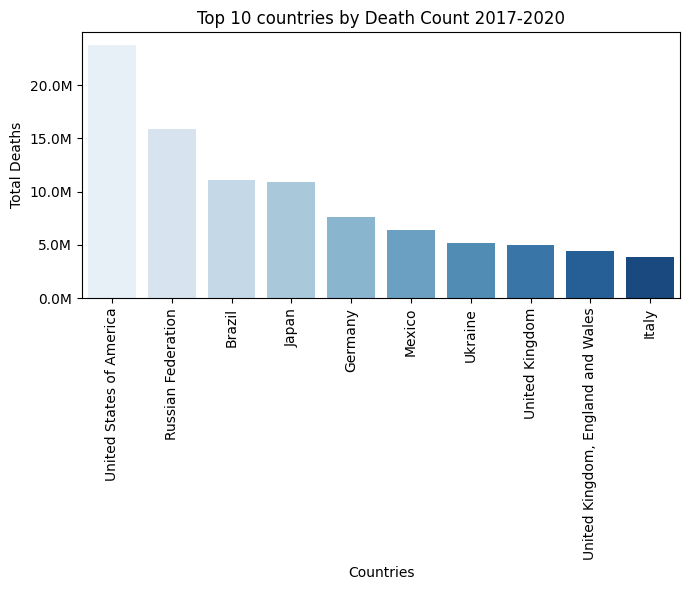

In [ ]:
#Visualization:

plt.figure(figsize =(7,6))
#plt.bar(top_10_countries.index, top_10_countries.values, color='Orange')
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='Blues')
plt.xlabel("Countries")
plt.ylabel("Total Deaths")
plt.title("Top 10 countries by Death Count 2017-2020")
#for better readability
plt.xticks(list(range(0,len(top_10_countries))), top_10_countries.index)
plt.xticks(rotation =90)
formatter = FuncFormatter(millions_formatter_le6)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

## Sex-based analysis of mort_df_filtered_overall

Let's determine the death count for each sex and see which has a higher death count



*   Using the mort_df_filtered_overall dataframe, groupby 'Sex' and sum the values for 'Total_Deaths'


Based on the data, males had a higher death count than females.


In [ ]:
#Sex based analysis:
#death counts based on sex
sex_death_counts = mort_df_filtered_overall.groupby('Sex')['Total_Deaths'].sum()
#sex the corresponding death count
max_death_sex = sex_death_counts.idxmax()
min_death_sex = sex_death_counts.idxmin()
max_death_count = sex_death_counts.max()
min_death_count = sex_death_counts.min()
print(f"{max_death_sex}: {max_death_count}")
print(f"{min_death_sex}: {min_death_count}")

Male: 79215066
Female: 72594687


## Year-wise Analysis

Now, we can see how the total number of deaths change across each year.



*   Using the mort_df_filtered_overall dataframe, groupby 'Year' and sum the values for 'Total_Deaths'



In [ ]:
#Year-wise analysis:
#Analyze how death counts have changed over years
deaths_by_year = mort_df_filtered_overall.groupby('Year')['Total_Deaths'].sum()
print(deaths_by_year)

Year
2017    42106852
2018    41200958
2019    39631074
2020    28870869
Name: Total_Deaths, dtype: int64


### Visualization of number of deaths year-wise
Visualize number of deaths from 2017-2020 using Seaborn library

Plotting Steps:
*   Set figure size = (6,6)
*   Use FuncFormatter to show total death count in millions for better readability
*   Add title and label x-axis as 'Year' and y-axis as 'Deaths'


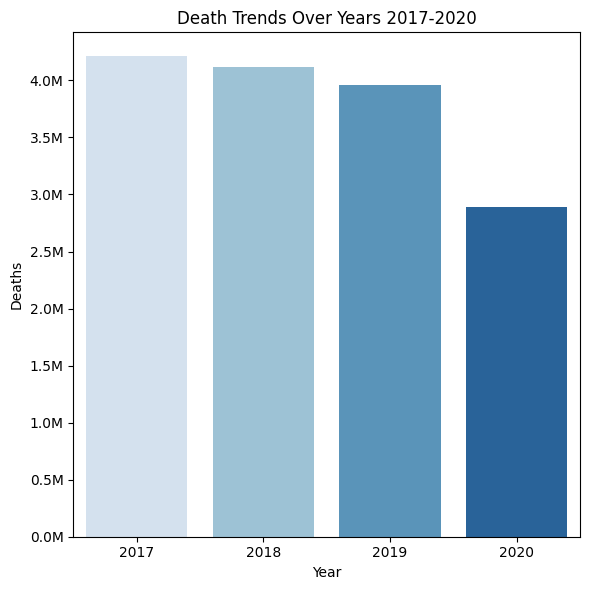

In [ ]:
#Visualization:

plt.figure(figsize =(6,6))
#plt.bar(top_10_countries.index, top_10_countries.values, color='Orange')
sns.barplot(x=deaths_by_year.index, y=deaths_by_year.values, palette='Blues')
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("Death Trends Over Years 2017-2020")
#for better readability

formatter = FuncFormatter(millions_formatter_le7)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

Next, let's see how the total number of deaths for males and females from 2017-2020.

In [ ]:
#Determine total number of deaths sex-based over years 2017-2020
Total_deaths_df = mort_df_filtered.loc[:,['Year','Total_Deaths', 'Sex']]
Total_deaths_df = Total_deaths_df.groupby(['Year', 'Sex'])['Total_Deaths'].sum().reset_index()
Total_deaths_df['Male'] = np.where(Total_deaths_df['Sex'] == 'Male', Total_deaths_df['Total_Deaths'], 0)
Total_deaths_df['Female'] = np.where(Total_deaths_df['Sex'] == 'Female', Total_deaths_df['Total_Deaths'], 0)
Total_deaths_df = Total_deaths_df.groupby(['Year']).sum().reset_index()
Total_deaths_df = Total_deaths_df.loc[:,['Year','Total_Deaths','Male','Female']]
Total_deaths_df

<ipython-input-30-3a357755bf86>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Total_deaths_df = Total_deaths_df.groupby(['Year']).sum().reset_index()


,Year,Total_Deaths,Male,Female
0,2017,42106852,21829308,20277544
1,2018,41200958,21408301,19792657
2,2019,39631074,20625874,19005200
3,2020,28870869,15351583,13519286


Visualize number of deaths for males and females from 2017-2020

Plotting Steps:
*   Set figure size = (6,6)
*   Use FuncFormatter to show total death count in millions for better readability
*   Add title and label x-axis as 'Year' and y-axis as 'Deaths'

<Figure size 600x600 with 0 Axes>

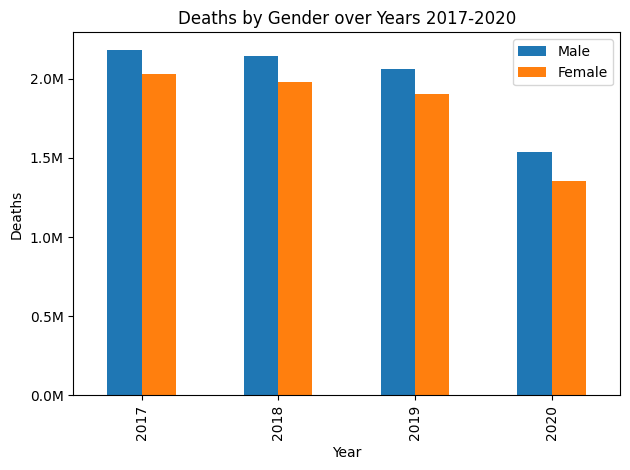

In [ ]:
#Visualization:

plt.figure(figsize =(6,6))
Total_deaths_df.plot(x='Year', y=['Male', 'Female'], kind='bar')
#sns.barplot(data=Total_deaths_df, x='Year', y=['Total_Deaths', 'Male', 'Female'], palette='magma')
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("Deaths by Gender over Years 2017-2020")
#for better readability

formatter = FuncFormatter(millions_formatter_le7)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

##Age-group wise analysis
For better readability and easy data ingestion, we have combined age groups into 6 groups which show the total number of deaths for each age group.

New age groups:


*   Age < 1: Represents deaths for ages less than a year
*   Under_20: Represents deaths for ages 1-19
*   Age_20-39: Represents deaths for ages 20-39
*   Age_40-59: Represents deaths for ages 40-59
*   Age_60-79: Represents deaths for ages 60-79
*   Age_80-95+: Represents deaths for ages above 79



In [ ]:
#Grouping the death columns bassed on the age group for readability
Deaths_by_age_df = mort_df_filtered.copy()
#under 20
Deaths_by_age_df['Under_20'] = Deaths_by_age_df['Age_0'] + Deaths_by_age_df['Age_1'] + Deaths_by_age_df['Age_10-14']
+ Deaths_by_age_df['Age_15-19']+ Deaths_by_age_df['Age_2']+Deaths_by_age_df['Age_3']+Deaths_by_age_df['Age_4']+Deaths_by_age_df['Age_5-9']
#ages 20-39
Deaths_by_age_df['Age_20-39'] = Deaths_by_age_df['Age_20-24'] + Deaths_by_age_df['Age_25-29'] + Deaths_by_age_df['Age_30-34']
+ Deaths_by_age_df['Age_35-39']
#ages 40-59
Deaths_by_age_df['Age_40-59'] = Deaths_by_age_df['Age_40-44'] + Deaths_by_age_df['Age_45-49'] + Deaths_by_age_df['Age_50-54']
+ Deaths_by_age_df['Age_55-59']
#ages 60-79
Deaths_by_age_df['Age_60-79'] = Deaths_by_age_df['Age_60-64'] + Deaths_by_age_df['Age_65-69'] + Deaths_by_age_df['Age_70-74']
+ Deaths_by_age_df['Age_75-79']
#ages 80+
Deaths_by_age_df['Age_80+'] = Deaths_by_age_df['Age_80-84'] + Deaths_by_age_df['Age_85-89'] + Deaths_by_age_df['Age_90-94']
+ Deaths_by_age_df['Age_95+']

Deaths_by_age_df['Age<1'] = Deaths_by_age_df['Day_0'] + Deaths_by_age_df['Day_1-6'] + Deaths_by_age_df['Day_7-27'] + Deaths_by_age_df['Day_27-364']
#Grouping by Year and Sex
Deaths_by_age_df_filtered = Deaths_by_age_df.loc[:,['Year','Sex','Total_Deaths','Under_20','Age_20-39','Age_40-59','Age_60-79','Age_80+','Age<1']]
Deaths_by_age_df_filtered = Deaths_by_age_df_filtered.groupby(['Year', 'Sex'])['Total_Deaths','Age<1','Under_20','Age_20-39','Age_40-59','Age_60-79','Age_80+'].sum().reset_index()

Deaths_by_age_df_filtered

<ipython-input-32-39491b0bafab>:22: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Deaths_by_age_df_filtered = Deaths_by_age_df_filtered.groupby(['Year', 'Sex'])['Total_Deaths','Age<1','Under_20','Age_20-39','Age_40-59','Age_60-79','Age_80+'].sum().reset_index()


,Year,Sex,Total_Deaths,Age<1,Under_20,Age_20-39,Age_40-59,Age_60-79,Age_80+
0,2017,Female,20277544,261868,324167,358532,1219469,4131431,9492128
1,2017,Male,21829308,328596,413634,943966,2341287,6319400,6504736
2,2018,Female,19792657,243853,304377,348181,1193226,4156336,9155395
3,2018,Male,21408301,306132,387555,900652,2311422,6360558,6300147
4,2019,Female,19005200,213227,265067,290077,1093206,4071801,8973804
5,2019,Male,20625874,269223,340434,794315,2152462,6251652,6240660
6,2020,Female,13519286,112961,137632,196551,758422,2859383,6340014
7,2020,Male,15351583,142684,176315,543991,1393837,4490702,5141830


###Visualize deaths age-group wise:(Interactive)
We used melt() to transform our DataFrame from wide form to long form and to unpivot or transform these columns into rows.
Using plotly to generate interactive visualizations

Fun fact: Hover over to learn more about the data

In [ ]:
#Deaths by Age Group and Gender for the years 2017-2020
df_melted = Deaths_by_age_df_filtered.melt(id_vars=['Year', 'Sex', 'Total_Deaths'],
                    var_name='Age_Group',
                    value_name='Deaths')
# Create an interactive line plot using Plotly Express
fig = px.line(df_melted, x='Year', y='Deaths', color='Age_Group', line_group='Sex',
              labels={'Deaths': 'Number of Deaths'},
              title='Deaths by Age Group and Gender (2017-2020)',
              line_dash='Sex', markers=True
             )
fig.update_xaxes(tickvals=[2017, 2018, 2019, 2020])
# Show the interactive plot
fig.show()


Here we can see the total number of deaths for each age group.

In [ ]:
#Age group analysis:
#top 10 deaths based on age groups
mort_df_age = Deaths_by_age_df_filtered[['Age<1','Under_20','Age_20-39','Age_40-59','Age_60-79','Age_80+']]
top_deaths_age = mort_df_age.sum()
top_deaths_age= top_deaths_age.nlargest(10)
print(top_deaths_age)

Age_80+      58148714
Age_60-79    38641263
Age_40-59    12463331
Age_20-39     4376265
Under_20      2349181
Age<1         1878544
dtype: int64


### Visualization of deaths counts based on age groups
Visualize deaths counts based on age groups

Plotting Steps:
*   Set figure size = (6,6)
*   Use FuncFormatter to show total death count in millions for better readability
*   Add title and label x-axis as 'Age groups' and y-axis as 'Deaths'

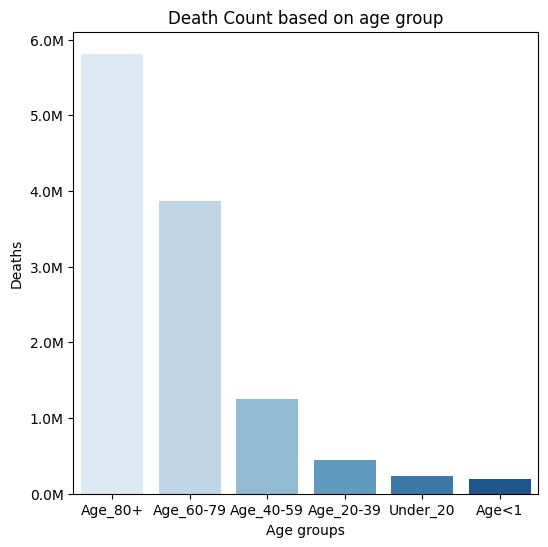

In [ ]:
#Visualization:

plt.figure(figsize =(6,6))
sns.barplot(x=top_deaths_age.index, y=top_deaths_age.values, palette='Blues')

plt.xlabel("Age groups")
plt.ylabel("Deaths")
plt.title("Death Count based on age group")
#for better readability
plt.xticks(list(range(0,len(top_deaths_age))), top_deaths_age.index)

formatter = FuncFormatter(millions_formatter_le7)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

## Curious to know which age group has highest number of deaths?
We can see from our data that the 80+ age group has the highest number of deaths.

In [ ]:
#Age group analysis:
#find the age group with highest total deaths
age_group_deaths= mort_df_age.sum()
max_death_age_group = age_group_deaths.idxmax()
max_death_age_count = age_group_deaths.max()
print(f"{max_death_age_group}: {max_death_age_count}")

Age_80+: 58148714


### Visualization based on individual age group and gender
Now we can determine the number of deaths based on individual age groups and gender from 2017-2020

Plotting Steps:
*   Create a subplot with 2 rows and columns to position our plots with figure size of (12,10)
*   Create a new dataframe filtered for by year
*   Plot the dataframe as a bar graph
*   Set x = 'Sex' and y = ['Age<1','Under_20', 'Age_20-39', 'Age_40-59', 'Age_60-79','Age_80+']
*   Select ax value to dictate plot position
*   Use FuncFormatter to show total death count in millions for better readability
*   Add title and label x-axis as 'Age groups' and y-axis as 'Deaths'

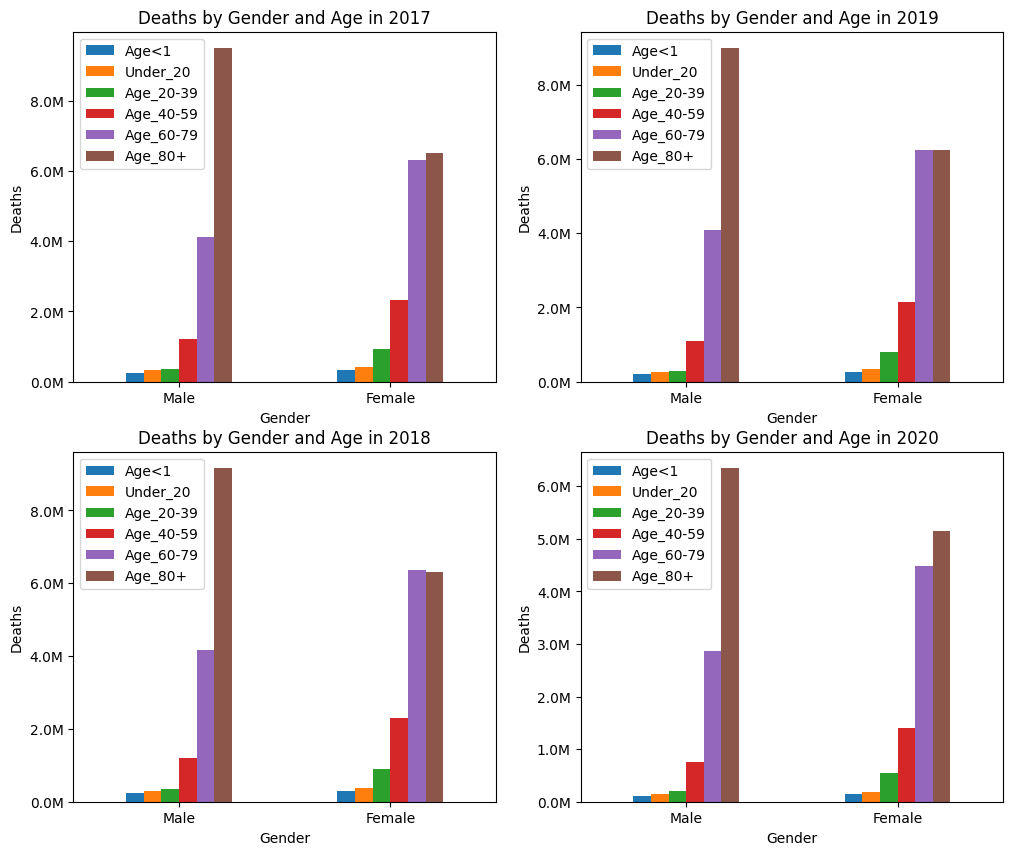

In [ ]:
# #Age group & sex-based analysis year wise

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot the bar chart in the first subplot (ax[0, 0])
Y17_deaths_df = Deaths_by_age_df_filtered.loc[Deaths_by_age_df_filtered['Year'] == 2017]
Y17_deaths_df.plot(x='Sex', y=['Age<1','Under_20', 'Age_20-39', 'Age_40-59', 'Age_60-79','Age_80+'], kind='bar', ax=ax[0, 0])
ax[0, 0].set_xticklabels(['Male', 'Female'], rotation=0)
ax[0, 0].set_xlabel('Gender')
ax[0, 0].set_ylabel('Deaths')
ax[0, 0].set_title('Deaths by Gender and Age in 2017')
ax[0, 0].legend()
formatter = FuncFormatter(millions_formatter_le6)
ax[0, 0].yaxis.set_major_formatter(formatter)

Y18_deaths_df = Deaths_by_age_df_filtered.loc[Deaths_by_age_df_filtered['Year'] == 2018]
Y18_deaths_df.plot(x='Sex', y=['Age<1','Under_20', 'Age_20-39', 'Age_40-59', 'Age_60-79','Age_80+'], kind='bar', ax=ax[1,0])
ax[1, 0].set_xticklabels(['Male', 'Female'], rotation=0)
ax[1, 0].set_xlabel('Gender')
ax[1, 0].set_ylabel('Deaths')
ax[1, 0].set_title('Deaths by Gender and Age in 2018')
ax[1, 0].legend()
formatter = FuncFormatter(millions_formatter_le6)
ax[1, 0].yaxis.set_major_formatter(formatter)

Y19_deaths_df = Deaths_by_age_df_filtered.loc[Deaths_by_age_df_filtered['Year'] == 2019]
Y19_deaths_df.plot(x='Sex', y=['Age<1','Under_20', 'Age_20-39', 'Age_40-59', 'Age_60-79','Age_80+'], kind='bar', ax=ax[0,1])
ax[0, 1].set_xticklabels(['Male', 'Female'], rotation=0)
ax[0, 1].set_xlabel('Gender')
ax[0, 1].set_ylabel('Deaths')
ax[0, 1].set_title('Deaths by Gender and Age in 2019')
ax[0, 1].legend()
formatter = FuncFormatter(millions_formatter_le6)
ax[0, 1].yaxis.set_major_formatter(formatter)

Y20_deaths_df = Deaths_by_age_df_filtered.loc[Deaths_by_age_df_filtered['Year'] == 2020]
Y20_deaths_df.plot(x='Sex', y=['Age<1','Under_20', 'Age_20-39', 'Age_40-59', 'Age_60-79','Age_80+'], kind='bar', ax=ax[1,1])
ax[1, 1].set_xticklabels(['Male', 'Female'], rotation=0)
ax[1, 1].set_xlabel('Gender')
ax[1, 1].set_ylabel('Deaths')
ax[1, 1].set_title('Deaths by Gender and Age in 2020')
ax[1, 1].legend()
aformatter = FuncFormatter(millions_formatter_le6)
ax[1, 1].yaxis.set_major_formatter(formatter)





# Analysis after merging with Causes_df

Next, we merge our deaths_by_age_df with our causes_df. By merging with the causes dataframe, we can get the description of our codes. However, as you can see below after merging, our mort_df_causes has 96696 rows (much smaller than our mort_df_filtered_overall). This is because the causes_df does not have all the codes from the mortality dataframe. We will use the mort_df_causes for the following analysis.

In [ ]:
#cast type - with causes_codes
Deaths_by_age_df['Cause'] = Deaths_by_age_df['Cause'].astype("string")
causes_df['code'] = causes_df['code'].astype("string")
#create a dataframe by joining causes dataset with the filtered ICD-10 dataset
mort_df_causes = pd.merge(Deaths_by_age_df, causes_df, left_on='Cause', right_on='code', how='inner')
#Keeping only the necessary columns
mort_df_causes = mort_df_causes.drop(['Cause_x', 'Detailed List Numbers'], axis =1)
mort_df_causes.rename(columns={'Cause_y': 'Cause'}, inplace = True)


In [ ]:
mort_df_causes['Cause'].unique()
mort_df_causes.replace('Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified','abnormal findings', inplace=True)

In [ ]:
# Drop nulls
mort_df_causes.dropna(subset =['code'],inplace =True)

In [ ]:
mort_df_causes.shape

(96696, 41)

In [ ]:
mort_df_causes.head()

,Year,Sex,Total_Deaths,Age_0,Age_1,Age_2,Age_3,Age_4,Age_5-9,Age_10-14,...,Day_27-364,Country,Under_20,Age_20-39,Age_40-59,Age_60-79,Age_80+,Age<1,code,Cause
0,2017,Male,281784,1608,133,87,77,60,214,254,...,0,Ukraine,1995,10262,39703,92819,59040,1608,1000,All causes
1,2017,Female,292339,1178,99,59,47,36,177,148,...,0,Ukraine,1425,3177,14916,61879,140926,1178,1000,All causes
2,2019,Male,287513,1208,107,71,54,38,214,258,...,0,Ukraine,1573,9520,41288,101500,64670,1208,1000,All causes
3,2019,Female,293601,981,83,42,44,22,157,151,...,0,Ukraine,1215,2845,15058,65778,150860,981,1000,All causes
4,2018,Male,290533,1344,117,80,51,57,228,267,...,0,Ukraine,1728,10210,42050,98966,62662,1344,1000,All causes


##Country-wise analysis of mort_df_causes
We can see that the country with the highest number of deaths is now the Russian Federation. Using our previous dataset, the highest death count was the United States.

In [ ]:
#Country-wise analysis:
#Getting top 5 countries based on the death count
#Grouping by country and summing up deaths
country_death_counts = mort_df_causes.groupby('Country')['Total_Deaths'].sum()
#Sorting the df by death counts total column in desc order and selecting top 10
top_10_countries = country_death_counts.nlargest(10)
print(top_10_countries)

Country
Russian Federation          15930711
Ukraine                      5145866
United States of America     1834020
Philippines                  1761166
Egypt                        1677578
Japan                        1196884
Brazil                       1025253
South Africa                  896789
Germany                       827722
United Kingdom                541451
Name: Total_Deaths, dtype: int64


###Visualization of top 10 countries by death count
Visualize the top 10 countries by death count using the Seaborn library

Plotting Steps:

*   Set figure size = (6,6)
*   Use FuncFormatter to show total death count in millions for better readability
*   Add title and label x-axis as 'Countries' and y-axis as 'Deaths'

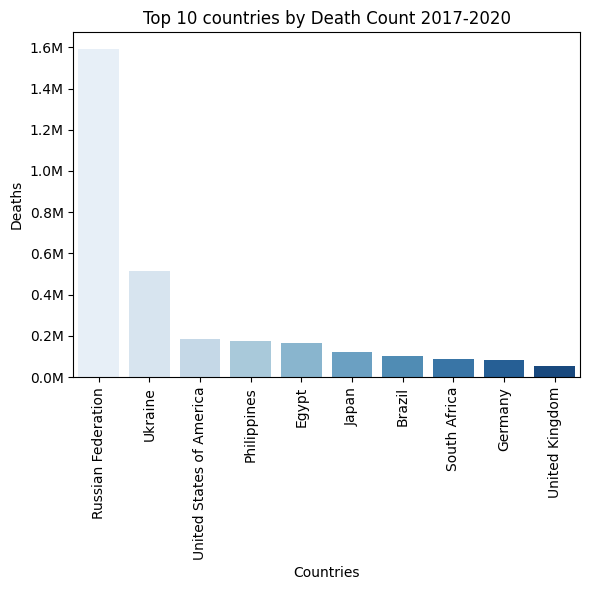

In [ ]:
#Visualization:

plt.figure(figsize =(6,6))
#plt.bar(top_10_countries.index, top_10_countries.values, color='Orange')
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='Blues')
plt.xlabel("Countries")
plt.ylabel("Deaths")
plt.title("Top 10 countries by Death Count 2017-2020")
#for better readability
plt.xticks(list(range(0,len(top_10_countries))), top_10_countries.index)
plt.xticks(rotation =90)
formatter = FuncFormatter(millions_formatter_le7)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

## Death count wise analysis of mort_df_causes
Let's determine the top 10 causes of death from 2017-2020.

In [ ]:
#Top 10 Death Causes based on the death count over 2017-2020:
#grouping by causes and summing up deaths
top_death_causes = mort_df_causes.groupby(['Cause'])['Total_Deaths'].sum()
#selecting top 10
top_10_death_causes = top_death_causes.nlargest(10)
print(top_10_death_causes)

Cause
All causes                            7200955
Diseases of the circulatory system    3729460
abnormal findings                     3249309
Ischaemic heart diseases              2886737
Cerebrovascular diseases              2544369
Mental and behavioural disorders      1484103
COVID-19                              1431326
Other heart diseases                  1139105
Neoplasms                             1127651
Hypertensive diseases                 1051114
Name: Total_Deaths, dtype: int64


### Visualization of top 10 causes by death count
Visualize the top 10 causes of death count using Matplotlib

Plotting Steps:

*   Set figure size = (6,6)
*   Use FuncFormatter to show total death count in millions for better readability
*   Add title and label x-axis as 'Countries' and y-axis as 'Deaths'

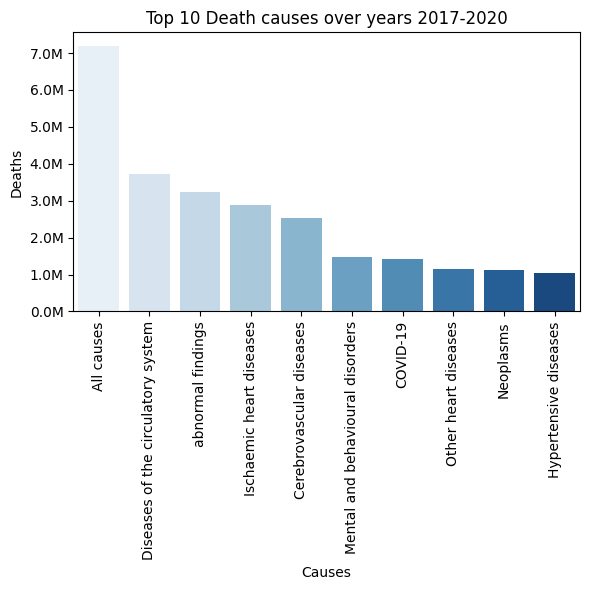

In [ ]:
plt.figure(figsize =(6,6))
sns.barplot(x=top_10_death_causes.index, y=top_10_death_causes.values, palette='Blues')
plt.xlabel("Causes")
plt.ylabel("Deaths")
plt.title("Top 10 Death causes over years 2017-2020")
#for better readability
plt.xticks(rotation =90)
formatter = FuncFormatter(millions_formatter_le6)
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

##Causes-Year-wise analysis
Now, we can break this down further and separately visualize the top 10 causes of death for each year.

In [ ]:
#Causes-Year-wise analysis:2017

Deaths_by_cause_df = mort_df_causes
Deaths_by_cause_df = Deaths_by_cause_df.loc[:,['Year','Sex','Total_Deaths','Under_20','Age_20-39',
                                               'Age_40-59','Age_60-79','Age_80+','Age<1', 'Cause', 'Country']]
Deaths_by_cause_df = Deaths_by_cause_df.groupby(['Year','Cause']).sum().reset_index()

# Top death causes for the year 2017
Deaths_by_cause_2017_df = Deaths_by_cause_df.loc[Deaths_by_cause_df['Year'] == 2017]
Deaths_by_cause_2017_df.sort_values(by=['Total_Deaths'],ascending=False,inplace=True)
Deaths_by_cause_2017_df_top10 = Deaths_by_cause_2017_df.head(10)
Deaths_by_cause_2017_df_top10 = Deaths_by_cause_2017_df_top10.loc[:,['Year','Cause','Total_Deaths']]

#Top death causes for the year 2018
Deaths_by_cause_2018_df = Deaths_by_cause_df.loc[Deaths_by_cause_df['Year'] == 2018]
Deaths_by_cause_2018_df.sort_values(by=['Total_Deaths'],ascending=False,inplace=True)
Deaths_by_cause_2018_df_top10 = Deaths_by_cause_2018_df.head(10)
Deaths_by_cause_2018_df_top10 = Deaths_by_cause_2018_df_top10.loc[:,['Year','Cause','Total_Deaths']]

#Top death causes for the year 2019
Deaths_by_cause_2019_df = Deaths_by_cause_df.loc[Deaths_by_cause_df['Year'] == 2019]
Deaths_by_cause_2019_df.sort_values(by=['Total_Deaths'],ascending=False,inplace=True)
Deaths_by_cause_2019_df_top10 = Deaths_by_cause_2019_df.head(10)
Deaths_by_cause_2019_df_top10 = Deaths_by_cause_2019_df_top10.loc[:,['Year','Cause','Total_Deaths']]

#Top death causes for the year 2020
Deaths_by_cause_2020_df = Deaths_by_cause_df.loc[Deaths_by_cause_df['Year'] == 2020]
Deaths_by_cause_2020_df.sort_values(by=['Total_Deaths'],ascending=False,inplace=True)
Deaths_by_cause_2020_df = Deaths_by_cause_2020_df.head(10)
Deaths_by_cause_2020_df_top10 = Deaths_by_cause_2020_df.loc[:,['Year','Cause','Total_Deaths']]


<ipython-input-47-511bcfaf33af>:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-47-511bcfaf33af>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-511bcfaf33af>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-47-511bcfaf33af>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
Deaths_by_cause_2017_df_top10

,Year,Cause,Total_Deaths
4,2017,All causes,2401603
20,2017,Diseases of the circulatory system,1248635
45,2017,Ischaemic heart diseases,959686
110,2017,abnormal findings,898899
10,2017,Cerebrovascular diseases,812883
69,2017,Mental and behavioural disorders,400811
72,2017,Neoplasms,373245
77,2017,Other heart diseases,364553
37,2017,Hypertensive diseases,309352
90,2017,Remainder of diseases of the nervous system,284917


In [ ]:
Deaths_by_cause_2018_df_top10

,Year,Cause,Total_Deaths
115,2018,All causes,2417154
131,2018,Diseases of the circulatory system,1248844
156,2018,Ischaemic heart diseases,952737
221,2018,abnormal findings,899145
121,2018,Cerebrovascular diseases,765306
180,2018,Mental and behavioural disorders,393762
183,2018,Neoplasms,376802
188,2018,Other heart diseases,370937
148,2018,Hypertensive diseases,303812
201,2018,Remainder of diseases of the nervous system,276155


In [ ]:
Deaths_by_cause_2019_df_top10

,Year,Cause,Total_Deaths
226,2019,All causes,2380768
242,2019,Diseases of the circulatory system,1231535
267,2019,Ischaemic heart diseases,929879
333,2019,abnormal findings,902359
232,2019,Cerebrovascular diseases,723675
291,2019,Mental and behavioural disorders,377447
294,2019,Neoplasms,377275
299,2019,Other heart diseases,350455
259,2019,Hypertensive diseases,283969
312,2019,Remainder of diseases of the nervous system,259025


In [ ]:
Deaths_by_cause_2020_df_top10

,Year,Cause,Total_Deaths
344,2020,COVID-19,1431326
446,2020,abnormal findings,548906
404,2020,Mental and behavioural disorders,312083
345,2020,Cerebrovascular diseases,242505
397,2020,Malignant neoplasm of prostate,165855
372,2020,Hypertensive diseases,153981
425,2020,Remainder of diseases of the nervous system,135425
428,2020,Remainder of malignant neoplasms,106886
388,2020,"Malignant neoplasm of colon, rectum and anus",93265
395,2020,Malignant neoplasm of ovary,57851


### Visualization of top causes of death year wise
Now we can plot the top causes of deaths for each year from 2017-2020

Plotting Steps:
*   Create a subplot with 2 rows and columns to position our plots with figure size of (16,16)
*   Create a new dataframe filtered for by year
*   Plot the dataframe as a bar graph
*   Set x = 'Cause' and y = 'Total_Deaths'
*   Select ax value to dictate plot position
*   Use FuncFormatter to show total death count in millions for better readability
*   Add title and label x-axis as 'Age groups' and y-axis as 'Deaths'

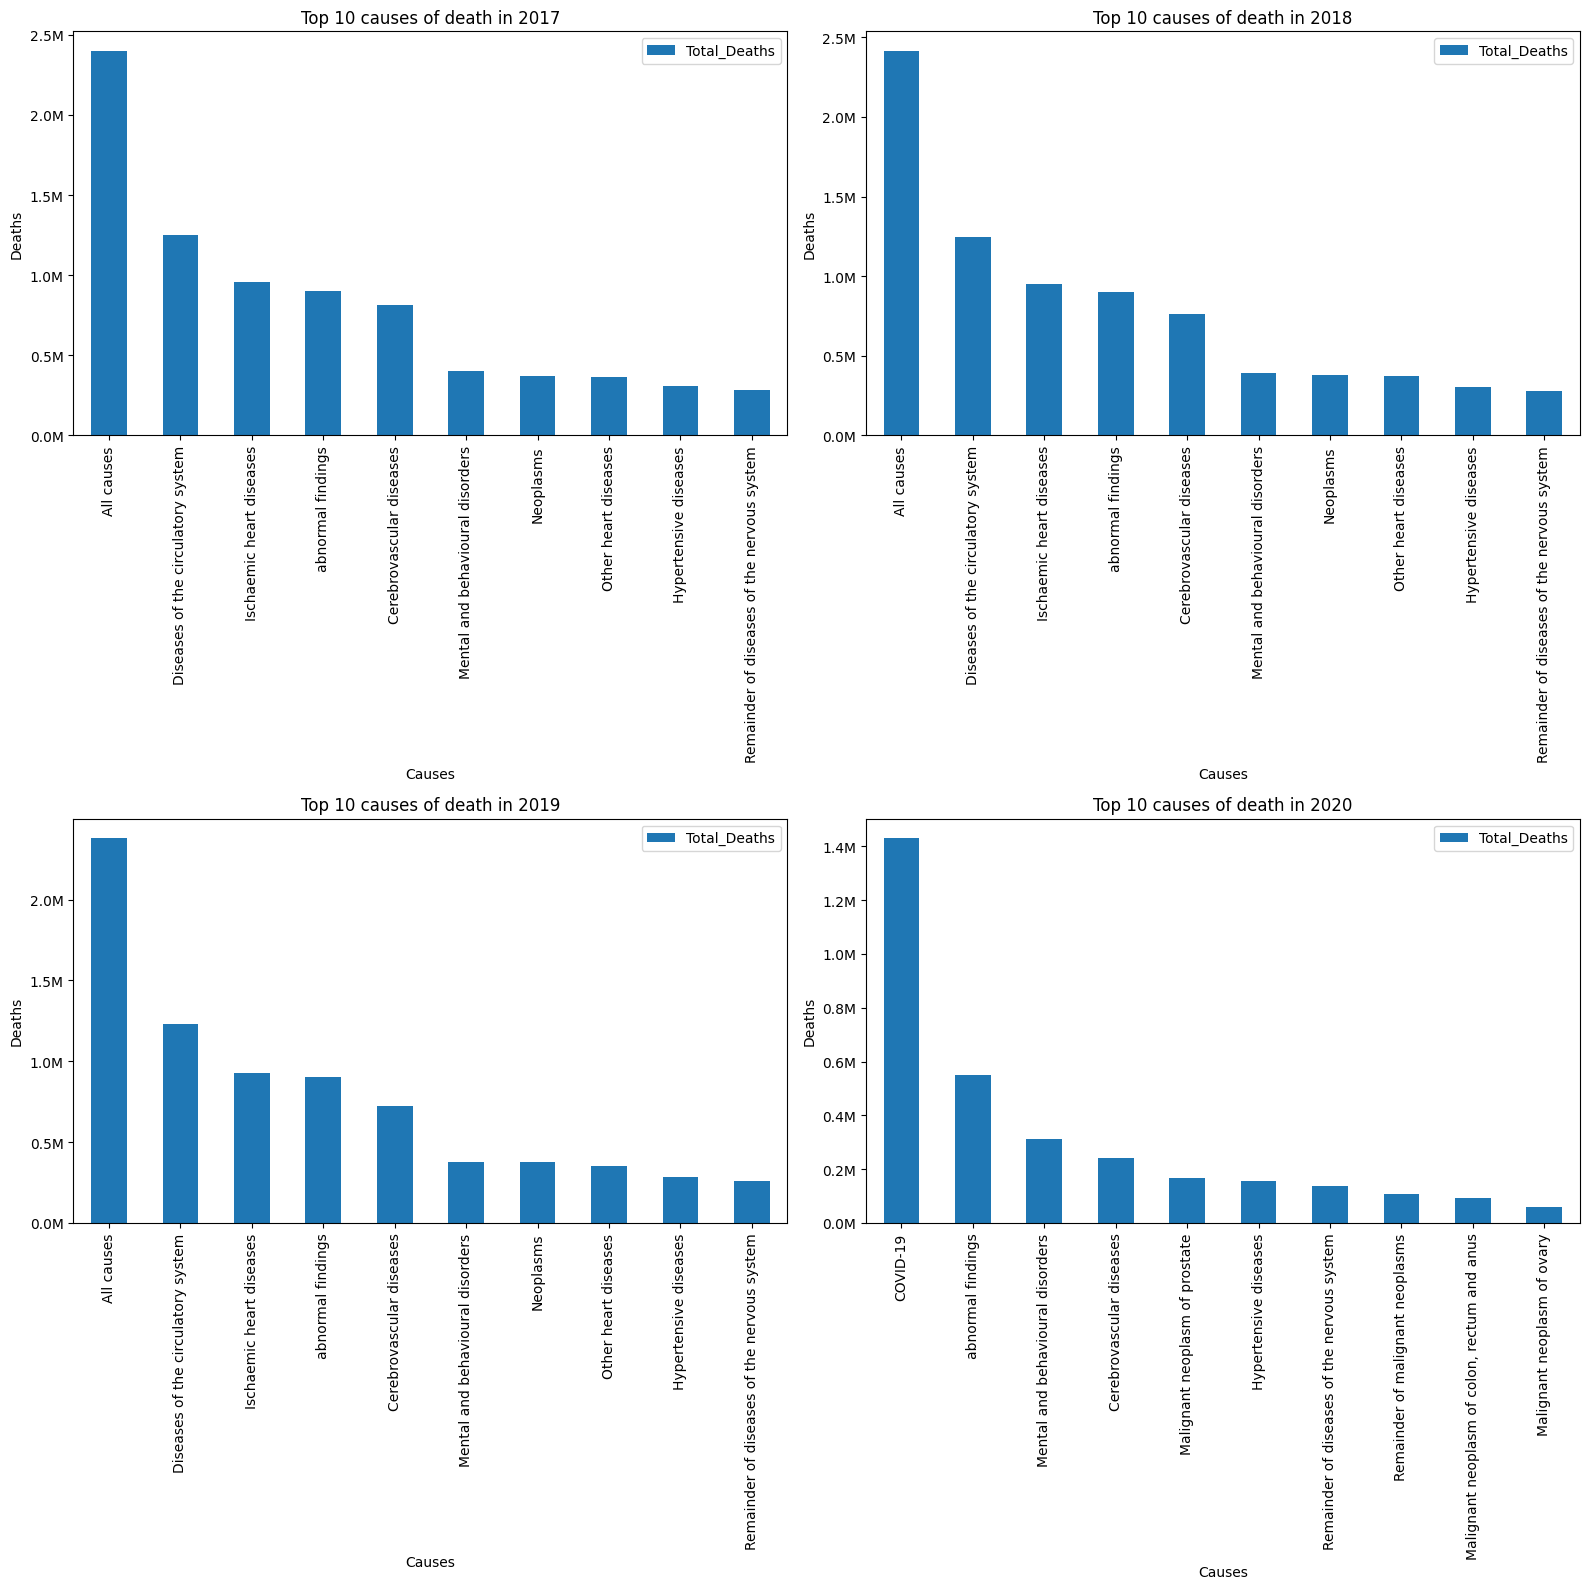

In [ ]:
#Visualization:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))
Deaths_by_cause_2017_df_top10.plot(x='Cause', y=['Total_Deaths'], kind='bar', ax=ax[0, 0])
# ax[0, 0].set_xticks(rotation=90)
ax[0, 0].set_xlabel('Causes')
ax[0, 0].set_ylabel('Deaths')
ax[0, 0].set_title('Top 10 causes of death in 2017')
ax[0, 0].legend()
formatter = FuncFormatter(millions_formatter_le6)
ax[0, 0].yaxis.set_major_formatter(formatter)

Deaths_by_cause_2018_df_top10.plot(x='Cause', y=['Total_Deaths'], kind='bar', ax=ax[0, 1])
# ax[0, 0].set_xticks(rotation=90)
ax[0, 1].set_xlabel('Causes')
ax[0, 1].set_ylabel('Deaths')
ax[0, 1].set_title('Top 10 causes of death in 2018')
ax[0, 1].legend()
formatter = FuncFormatter(millions_formatter_le6)
ax[0, 1].yaxis.set_major_formatter(formatter)


Deaths_by_cause_2019_df_top10.plot(x='Cause', y=['Total_Deaths'], kind='bar', ax=ax[1, 0])
# ax[0, 0].set_xticks(rotation=90)
ax[1, 0].set_xlabel('Causes')
ax[1, 0].set_ylabel('Deaths')
ax[1, 0].set_title('Top 10 causes of death in 2019')
ax[1, 0].legend()
formatter = FuncFormatter(millions_formatter_le6)
ax[1, 0].yaxis.set_major_formatter(formatter)

Deaths_by_cause_2020_df_top10.plot(x='Cause', y=['Total_Deaths'], kind='bar', ax=ax[1, 1])
# ax[0, 0].set_xticks(rotation=90)
ax[1, 1].set_xlabel('Causes')
ax[1, 1].set_ylabel('Deaths')
ax[1, 1].set_title('Top 10 causes of death in 2020')
ax[1, 1].legend()
formatter = FuncFormatter(millions_formatter_le6)
ax[1, 1].yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

# Analysis of Mortality and Population DataFrames Combined

We can also combine the mortality_df_filtered_overall and pop_births_filtered dataframes to gain new insights into categories such as birth rate and death rate.



*   Modify mort_df_filtered_overall to obtain total deaths for each country each year
*   Modify pop_births_filtered to obtain total population and births for each country each year
*   Add Death rate column by dividing total deaths by population
*   Add Birth rate column by dividing births by population
*   Add Birth to death ratio column by dividing births by total deaths



In [ ]:
Total_deaths_df = mort_df_filtered_overall.groupby(['Country','Year'])['Total_Deaths'].sum().reset_index()
Total_pop_births = pop_births_filtered.groupby(['Country','Year'])['Population','Births'].sum().reset_index()
years_to_keep = [2017, 2018, 2019, 2020]
Total_pop_births = Total_pop_births[Total_pop_births['Year'].isin(years_to_keep)]
Death_rate_df = pd.merge(Total_deaths_df,Total_pop_births, how='inner', left_on = ['Country','Year'],
                         right_on= ['Country','Year']  )
Death_rate_df['Death_rate'] = Death_rate_df['Total_Deaths']/Death_rate_df['Population']
Death_rate_df['Birth_rate'] = Death_rate_df['Births']/Death_rate_df['Population']
Death_rate_df['Birth_death_ratio'] = Death_rate_df['Births']/Death_rate_df['Total_Deaths']
Death_rate_df

<ipython-input-53-6b4870fa2957>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Year,Total_Deaths,Population,Births,Death_rate,Birth_rate,Birth_death_ratio
0,Andorra,2017,952,79236,588,0.012015,0.007421,0.617647
1,Andorra,2018,982,80243,543,0.012238,0.006767,0.552953
2,Andorra,2019,887,81011,540,0.010949,0.006666,0.608794
3,Andorra,2020,1070,82317,539,0.012999,0.006548,0.503738
4,Armenia,2019,52370,2962482,36041,0.017678,0.012166,0.688199
...,...,...,...,...,...,...,...,...
186,"United Kingdom, Scotland",2019,116216,5463300,49863,0.021272,0.009127,0.429055
187,"United Kingdom, Scotland",2020,128186,5463300,46809,0.023463,0.008568,0.365165
188,Uzbekistan,2017,321446,32388561,715519,0.009925,0.022092,2.225938
189,Uzbekistan,2018,309826,32956099,768520,0.009401,0.023320,2.480489


Find the Top 10 countries with the greatest death rate overall.

In [ ]:
Highest_death_rate = Death_rate_df.groupby(['Country'])['Total_Deaths','Population','Births'].sum().reset_index()
Highest_death_rate['Death_rate'] = Highest_death_rate['Total_Deaths']/Highest_death_rate['Population']
Highest_death_rate['Birth_rate'] = Highest_death_rate['Births']/Highest_death_rate['Population']
Highest_death_rate['Birth_death_ratio'] = Highest_death_rate['Births']/Highest_death_rate['Total_Deaths']
Top10_death_rate = Highest_death_rate.sort_values(by=['Death_rate'],ascending=False)
Top10_death_rate = Top10_death_rate.head(10)
Top10_death_rate

<ipython-input-54-ffc328cc3509>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Total_Deaths,Population,Births,Death_rate,Birth_rate,Birth_death_ratio
63,Ukraine,5145866,126274173,1008678,0.040752,0.007988,0.196017
50,Russian Federation,5252800,146764655,1481074,0.035791,0.010091,0.281959
8,Bulgaria,902270,28010758,246776,0.032212,0.008810,0.273506
52,Serbia,847370,27847823,254960,0.030429,0.009155,0.300884
28,Latvia,226140,7683691,76480,0.029431,0.009954,0.338198
30,Lithuania,323088,11218968,109382,0.028798,0.009750,0.338552
49,Romania,1574346,58452608,620600,0.026934,0.010617,0.394195
20,Hungary,784644,29334671,270577,0.026748,0.009224,0.344840
10,Croatia,324588,12237464,108536,0.026524,0.008869,0.334381
17,Georgia,383084,14897427,199247,0.025715,0.013375,0.520113


### Visualization of countries with highest death rate overall

We can determine the countries who had the most deaths relative to their total population.

Plotting Steps:
*   Set figure size = (6,6)
*   Add title and label x-axis as 'Country' and y-axis as 'Death Rate'

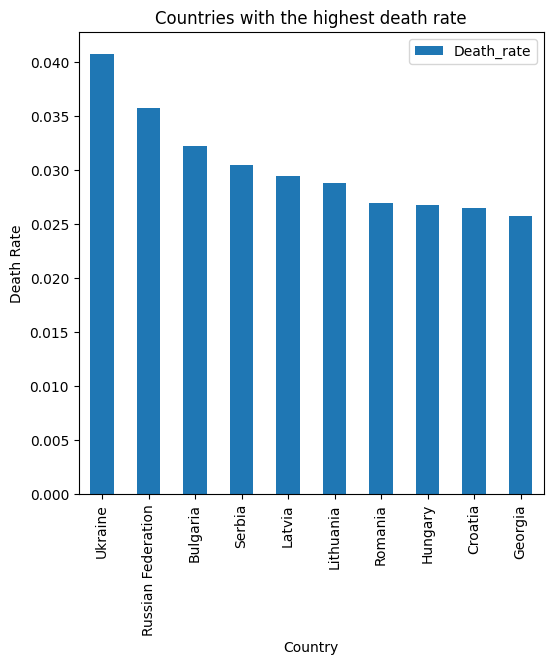

In [ ]:
Top10_death_rate.plot(x='Country', y=['Death_rate'], kind='bar', figsize=(6, 6))
plt.xlabel('Country')
plt.ylabel('Death Rate')
plt.title('Countries with the highest death rate')
plt.legend()
# plt.grid(True)
plt.show()


### Visualization of countries with highest death rate by year
Let's break this down further and determine the top 10 countries with the highest death rate each year.

Plotting Steps:
*   Create a subplot with 2 rows and columns to position our plots with figure size of (16,16)
*   Create a new dataframe filtered by year and sorted in descending order by Death_rate
*   Plot the dataframe as a bar graph
*   Set x = 'Country' and y = 'Death_rate'
*   Select ax value to dictate plot position
*   Add title and label x-axis as 'Age groups' and y-axis as 'Deaths'

<ipython-input-56-c65ccb58a145>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c65ccb58a145>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c65ccb58a145>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-56-c65ccb58a145>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

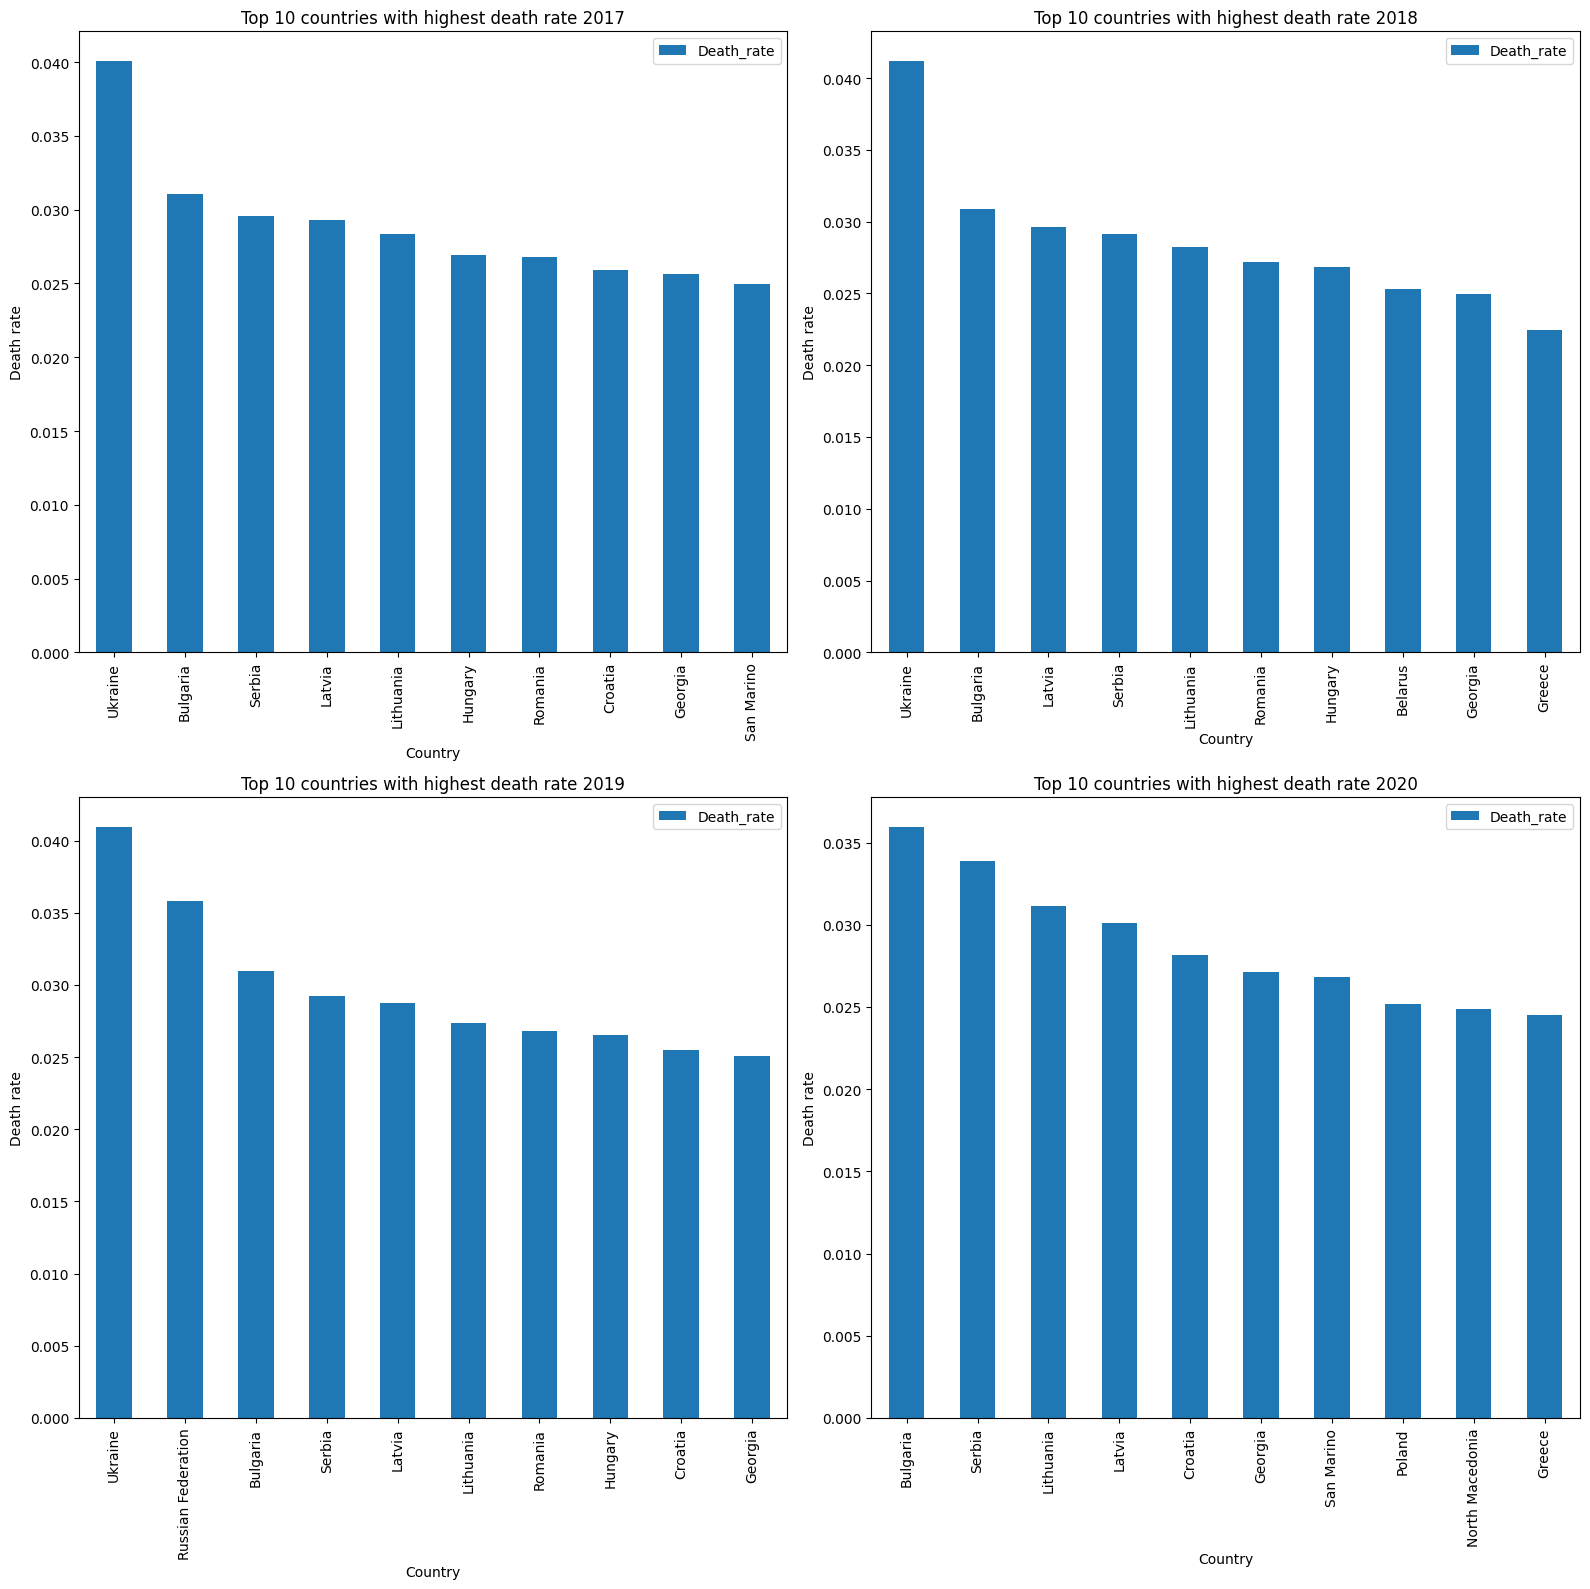

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))

Death_rate_2017 = Death_rate_df.loc[Death_rate_df['Year'] == 2017]
Death_rate_2017.sort_values(by='Death_rate', ascending=False, inplace=True)
Death_rate_2017 = Death_rate_2017.head(10)
Death_rate_2017.plot(x='Country', y=['Death_rate'], kind='bar', ax=ax[0, 0])
ax[0, 0].set_xlabel('Country')
ax[0, 0].set_ylabel('Death rate')
ax[0, 0].set_title('Top 10 countries with highest death rate 2017')
ax[0, 0].legend()

Death_rate_2018 = Death_rate_df.loc[Death_rate_df['Year'] == 2018]
Death_rate_2018.sort_values(by='Death_rate', ascending=False, inplace=True)
Death_rate_2018 = Death_rate_2018.head(10)
Death_rate_2018.plot(x='Country', y=['Death_rate'], kind='bar', ax=ax[0, 1])
ax[0, 1].set_xlabel('Country')
ax[0, 1].set_ylabel('Death rate')
ax[0, 1].set_title('Top 10 countries with highest death rate 2018')
ax[0, 1].legend()

Death_rate_2019 = Death_rate_df.loc[Death_rate_df['Year'] == 2019]
Death_rate_2019.sort_values(by='Death_rate', ascending=False, inplace=True)
Death_rate_2019 = Death_rate_2019.head(10)
Death_rate_2019.plot(x='Country', y=['Death_rate'], kind='bar', ax=ax[1, 0])
ax[1, 0].set_xlabel('Country')
ax[1, 0].set_ylabel('Death rate')
ax[1, 0].set_title('Top 10 countries with highest death rate 2019')
ax[1, 0].legend()


Death_rate_2020 = Death_rate_df.loc[Death_rate_df['Year'] == 2020]
Death_rate_2020.sort_values(by='Death_rate', ascending=False, inplace=True)
Death_rate_2020 = Death_rate_2020.head(10)
Death_rate_2020.plot(x='Country', y=['Death_rate'], kind='bar', ax=ax[1, 1])
ax[1, 1].set_xlabel('Country')
ax[1, 1].set_ylabel('Death rate')
ax[1, 1].set_title('Top 10 countries with highest death rate 2020')
ax[1, 1].legend()

plt.tight_layout()
plt.show()

### Visualization of countries with highest birth rate overall

Let's perform the same analysis to determine which countries have the highest births relative to their population.

Plotting Steps:
*   Set figure size = (6,6)
*   Add title and label x-axis as 'Country' and y-axis as 'Birth Rate'

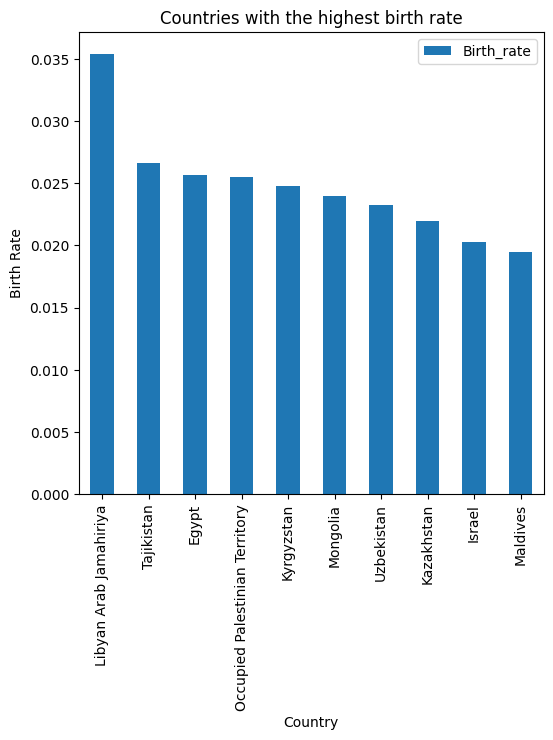

In [ ]:
Top10_birth_rate = Highest_death_rate.sort_values(by=['Birth_rate'],ascending=False)
Top10_birth_rate = Top10_birth_rate.head(10)
Top10_birth_rate.plot(x='Country', y=['Birth_rate'], kind='bar', figsize=(6, 6))
plt.xlabel('Country')
plt.ylabel('Birth Rate')
plt.title('Countries with the highest birth rate')
plt.legend()
# plt.grid(True)
plt.show()

### Visualization of countries with highest birth rate by year
Let's break this down further and determine the top 10 countries with the highest birth rate each year.

Plotting Steps:
*   Create a subplot with 2 rows and columns to position our plots with figure size of (16,16)
*   Create a new dataframe filtered by year and sorted in descending order by Birth_rate
*   Plot the dataframe as a bar graph
*   Set x = 'Country' and y = 'Birth_rate'
*   Select ax value to dictate plot position
*   Add title and label x-axis as 'Country' and y-axis as 'Birth rate'

<ipython-input-58-d31c41dfbcba>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-d31c41dfbcba>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-d31c41dfbcba>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-58-d31c41dfbcba>:32: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

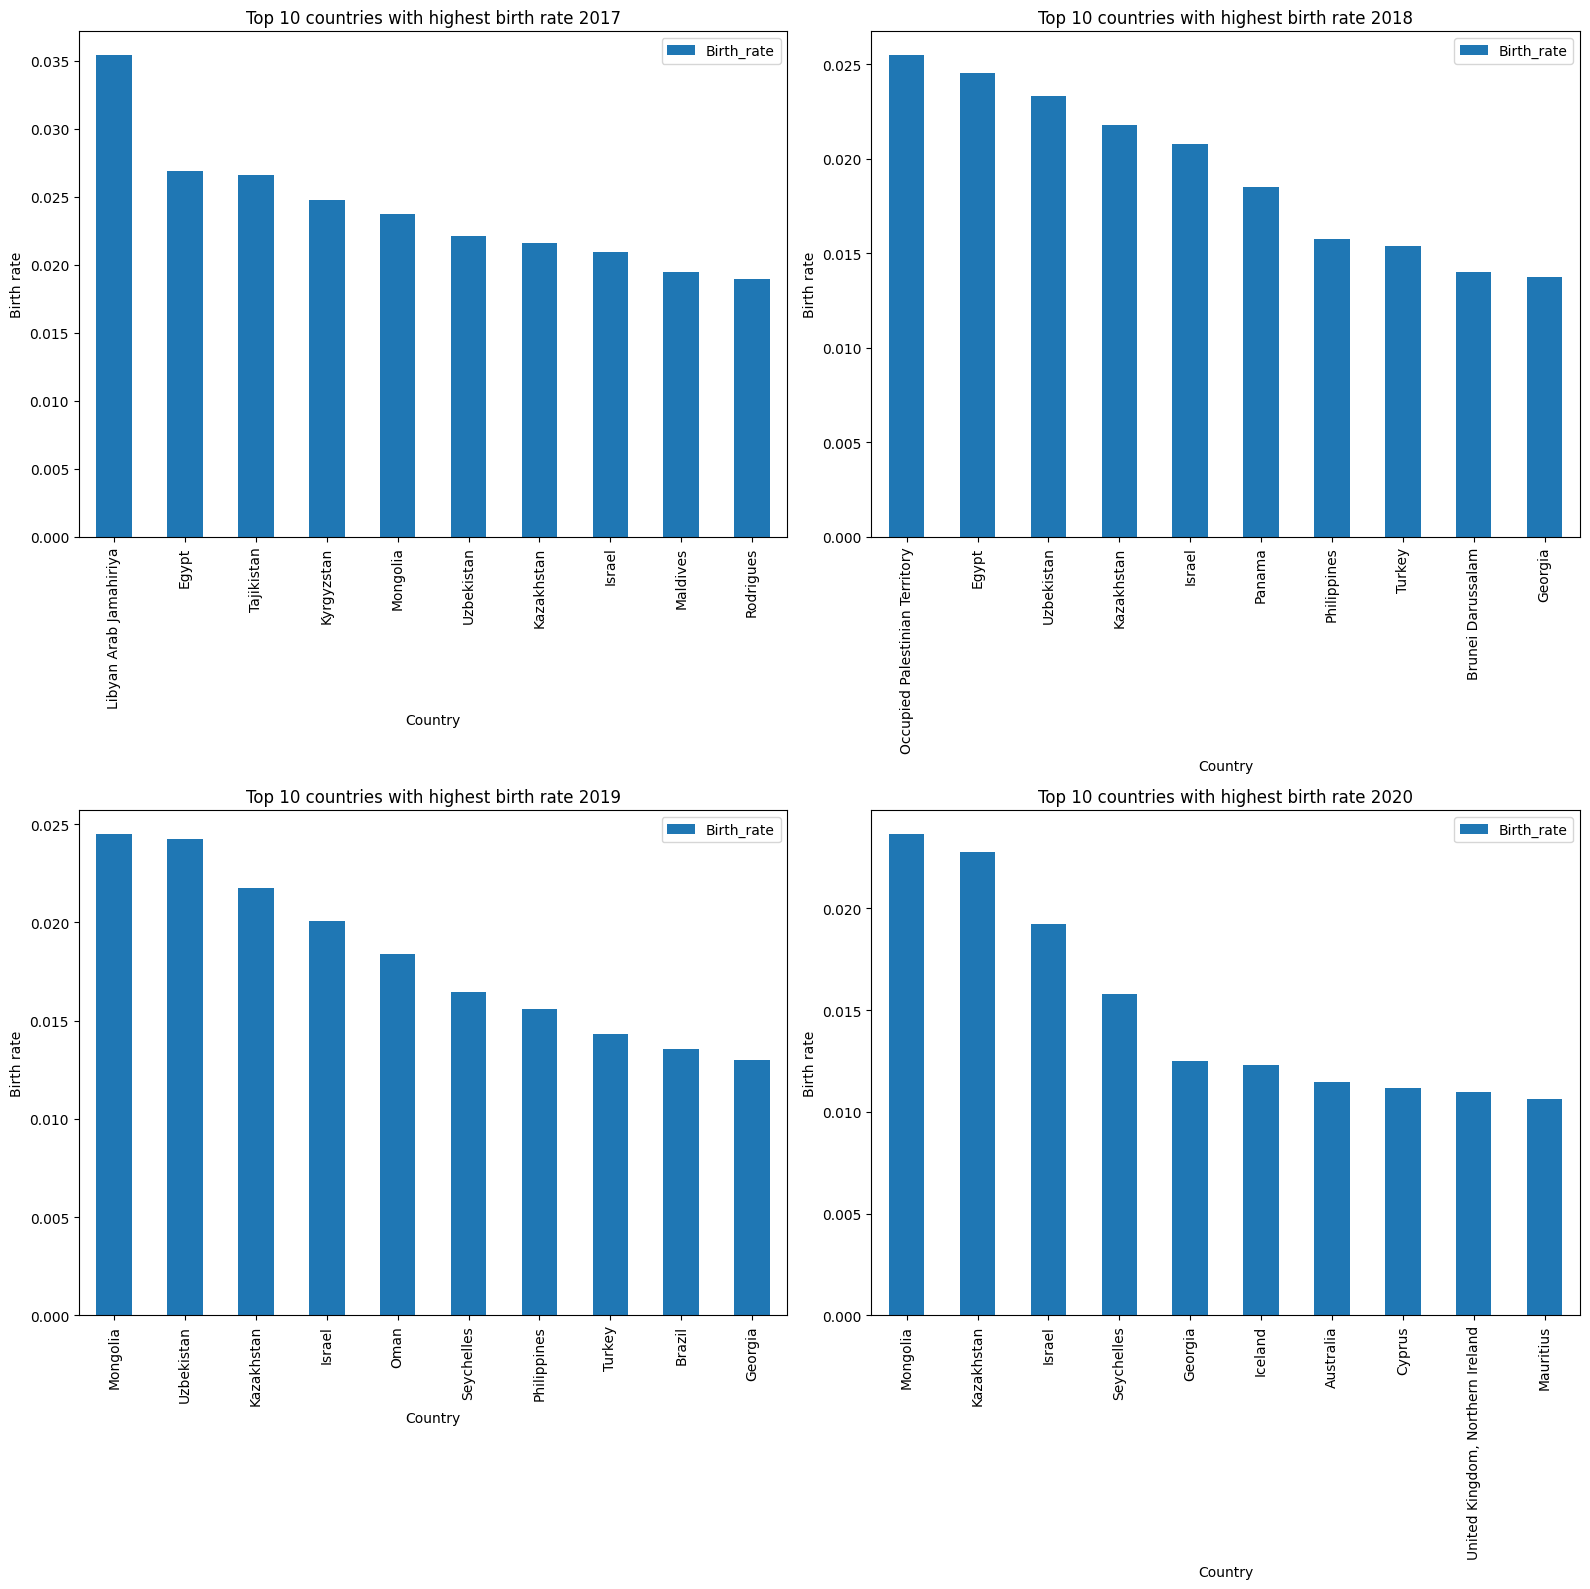

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))

Birth_rate_2017 = Death_rate_df.loc[Death_rate_df['Year'] == 2017]
Birth_rate_2017.sort_values(by='Birth_rate', ascending=False, inplace=True)
Birth_rate_2017 = Birth_rate_2017.head(10)
Birth_rate_2017.plot(x='Country', y=['Birth_rate'], kind='bar', ax=ax[0, 0])
ax[0, 0].set_xlabel('Country')
ax[0, 0].set_ylabel('Birth rate')
ax[0, 0].set_title('Top 10 countries with highest birth rate 2017')
ax[0, 0].legend()

Birth_rate_2018 = Death_rate_df.loc[Death_rate_df['Year'] == 2018]
Birth_rate_2018.sort_values(by='Birth_rate', ascending=False, inplace=True)
Birth_rate_2018 = Birth_rate_2018.head(10)
Birth_rate_2018.plot(x='Country', y=['Birth_rate'], kind='bar', ax=ax[0, 1])
ax[0, 1].set_xlabel('Country')
ax[0, 1].set_ylabel('Birth rate')
ax[0, 1].set_title('Top 10 countries with highest birth rate 2018')
ax[0, 1].legend()

Birth_rate_2019 = Death_rate_df.loc[Death_rate_df['Year'] == 2019]
Birth_rate_2019.sort_values(by='Birth_rate', ascending=False, inplace=True)
Birth_rate_2019 = Birth_rate_2019.head(10)
Birth_rate_2019.plot(x='Country', y=['Birth_rate'], kind='bar', ax=ax[1, 0])
ax[1, 0].set_xlabel('Country')
ax[1, 0].set_ylabel('Birth rate')
ax[1, 0].set_title('Top 10 countries with highest birth rate 2019')
ax[1, 0].legend()


Birth_rate_2020 = Death_rate_df.loc[Death_rate_df['Year'] == 2020]
Birth_rate_2020.sort_values(by='Birth_rate', ascending=False, inplace=True)
Birth_rate_2020 = Birth_rate_2020.head(10)
Birth_rate_2020.plot(x='Country', y=['Birth_rate'], kind='bar', ax=ax[1, 1])
ax[1, 1].set_xlabel('Country')
ax[1, 1].set_ylabel('Birth rate')
ax[1, 1].set_title('Top 10 countries with highest birth rate 2020')
ax[1, 1].legend()

plt.tight_layout()
plt.show()

# Modeling

### Dataset Descriptions





1. country_codes.csv - List of the country codes and the corresponding names
3. Causes_codes.csv - List of codes for causes of death and corresponding cause desciption
4. Morticd10_part4.csv - Mortalitity counts by country, gender and age groups for the year 2013- 2016
5. Morticd10_part5.csv - Mortalitity counts by country, gender and age groups for the year 2017- 2021


In [ ]:
mort_df_2013 = pd.read_csv('/content/drive/MyDrive/Morticd10_part4.csv')
mort_df_2017 = pd.read_csv('/content/drive/MyDrive/Morticd10_part5.csv')
country_codes_df = pd.read_csv('/content/drive/MyDrive/country_codes.csv')
causes_df = pd.read_csv('/content/drive/MyDrive/Causes_codes.csv')

<ipython-input-59-83f1e4a5595d>:1: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-59-83f1e4a5595d>:2: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



## Stacking mortality datasets
Using pd.concat() to stack mort_df_2013 and mort_df_2017 datasets to get the mortalilty data from year 2013 to 2021.

In [ ]:
concatenated_df = pd.concat([mort_df_2013, mort_df_2017], ignore_index =True)

In [ ]:
concatenated_df.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2013,101,1000,1,7,1,383,...,128.0,NaN,NaN,NaN,NaN,0.0,5.0,1.0,2.0,4.0
1,1400,NaN,NaN,2013,101,1000,2,7,1,334,...,192.0,NaN,NaN,NaN,NaN,0.0,2.0,7.0,3.0,5.0
2,1400,NaN,NaN,2013,101,1001,1,7,1,28,...,8.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,1400,NaN,NaN,2013,101,1001,2,7,1,30,...,16.0,NaN,NaN,NaN,NaN,0.0,0.0,2.0,2.0,1.0
4,1400,NaN,NaN,2013,101,1002,1,7,1,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [ ]:
concatenated_df.shape

(1688505, 39)

###Combining the data
Merging and cleaning steps:



1.  Using concatenated_df_filtered, create a df called concatenated_dfd that contains the necessary columns by dropping Admin1, SubDiv, List
2.  After filtering concatenated_df_filtered to have the necessary columns, merge it on Country with the country_codes_df table to get the required country names

In [ ]:
# create a dataframe by joining country dataset with the ICD-10 datasets
concatenated_df_filtered = concatenated_df.drop(['Admin1', 'SubDiv', 'List'], axis=1)
concatenated_df_filtered = pd.merge(concatenated_df_filtered, country_codes_df, left_on='Country', right_on='country', how='inner')
#Keeping only the necessary columns
concatenated_df_filtered = concatenated_df_filtered.drop(['country'], axis =1)
concatenated_df_filtered = concatenated_df_filtered.drop(['Frmat','IM_Frmat'], axis =1)

###Cleaning the concatenated_df_filtered
Preprocessing and cleaning steps:



1.   Filtering for years 2013 and 2018
2.   Keeping and renaming only the necessary columns
3. Converting columns with float dataype to integer
4. Filling any null values with 0
5. Make columns- 'Deaths1' ,'Deaths2' , 'Deaths3' , 'Deaths4' , 'Deaths5' , 'Deaths6' , 'Deaths7','Deaths8' , 'Deaths9' , 'Deaths10' , 'Deaths11' , 'Deaths12' , 'Deaths13' , 'Deaths14' , 'Deaths15', 'Deaths16' , 'Deaths17' , 'Deaths18' , 'Deaths19' , 'Deaths20' , 'Deaths21' , 'Deaths22' , 'Deaths23',
'Deaths24' , 'Deaths25' , 'Deaths26' , 'IM_Deaths1' , 'IM_Deaths2' ,IM_Deaths3' , 'IM_Deaths4' to integer
6. Assigning male and female to appriopate values in 'Sex' column

In [ ]:
#Filtering for year 2013 and greater
concatenated_df_filtered = concatenated_df_filtered[(concatenated_df_filtered['Year'] <= 2018) & (concatenated_df_filtered['Year'] >= 2013)]
concatenated_df_filtered = concatenated_df_filtered[concatenated_df_filtered['Sex'] != 9]
#convert death column values to integer - as the count will be in int

#columns that needs to be converted into int and in which we want to replace NaN with zeros
column_to_convert = ['Deaths1' ,'Deaths2' , 'Deaths3' , 'Deaths4' , 'Deaths5' , 'Deaths6' , 'Deaths7',
                     'Deaths8' , 'Deaths9' , 'Deaths10' , 'Deaths11' , 'Deaths12' , 'Deaths13' , 'Deaths14' , 'Deaths15',
                     'Deaths16' , 'Deaths17' , 'Deaths18' , 'Deaths19' , 'Deaths20' , 'Deaths21' , 'Deaths22' , 'Deaths23',
                     'Deaths24' ,'Deaths25' , 'Deaths26' , 'IM_Deaths1' , 'IM_Deaths2' , 'IM_Deaths3' , 'IM_Deaths4']

#Replace NaN with zeros in the specified columns
concatenated_df_filtered[column_to_convert] = concatenated_df_filtered[column_to_convert].fillna(0)
#convert the selected columns from float to integer
concatenated_df_filtered[column_to_convert] = concatenated_df_filtered[column_to_convert].astype(int)
#Sex: Male -1, Female-2
#concatenated_df_filtered['Sex'] =concatenated_df_filtered['Sex'].apply(lambda x:'Male' if x==1 else 'Female')
#rename the country column
concatenated_df_filtered = concatenated_df_filtered.rename(columns={'name': 'Country_Name', 'Deaths1': 'Total_Deaths'})
#Keeping only the necessary columns
#concatenated_df_final = concatenated_df_filtered[['Year', 'Sex','Country','Total_Deaths']]


In [ ]:
concatenated_df_final = concatenated_df_filtered.copy()

#concatenated_df_final = concatenated_df_filtered[['Year','Total_Deaths']]

Next, we merge our concatenated_df_final with our causes_df. By merging with the causes dataframe, we can get the description of our codes.

In [ ]:
#cast type - with causes_codes
concatenated_df_final['Cause'] = concatenated_df_final['Cause'].astype("string")
causes_df['code'] = causes_df['code'].astype("string")
#create a dataframe by joining causes dataset with the filtered ICD-10 dataset
concatenated_mort_df_causes = pd.merge(concatenated_df_final, causes_df, left_on='Cause', right_on='code', how='inner')
#Keeping only the necessary columns
concatenated_mort_df_causes = concatenated_mort_df_causes.drop(['Cause_x', 'Detailed List Numbers', 'Country'], axis =1)
concatenated_mort_df_causes.rename(columns={'Cause_y': 'Cause','Country_Name': 'Country'}, inplace = True)

In [ ]:
# Drop nulls
concatenated_mort_df_causes.dropna(subset =['code'],inplace =True)

In [ ]:
concatenated_mort_df_causes.head()

,Year,Sex,Total_Deaths,Deaths2,Deaths3,Deaths4,Deaths5,Deaths6,Deaths7,Deaths8,...,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4,Country,code,Cause
0,2013,1,383,12,0,0,0,0,0,0,...,0,0,0,5,1,2,4,Seychelles,1000,All causes
1,2013,2,334,17,2,0,0,0,2,0,...,0,0,0,2,7,3,5,Seychelles,1000,All causes
2,2014,1,425,12,3,0,0,0,1,0,...,0,0,0,4,2,2,4,Seychelles,1000,All causes
3,2014,2,300,5,1,0,0,0,2,0,...,0,0,0,2,2,0,1,Seychelles,1000,All causes
4,2015,1,401,7,1,0,0,0,5,0,...,0,0,0,2,2,1,2,Seychelles,1000,All causes


In [ ]:
concatenated_mort_df_causes.shape

(183539, 35)

In [ ]:

concatenated_mort_df_causes1 = concatenated_mort_df_causes[['Sex', 'Cause','Country','Total_Deaths']]

In [ ]:
concatenated_mort_df_causes1.head()

,Sex,Cause,Country,Total_Deaths
0,1,All causes,Seychelles,383
1,2,All causes,Seychelles,334
2,1,All causes,Seychelles,425
3,2,All causes,Seychelles,300
4,1,All causes,Seychelles,401


In [ ]:
#Year-wise analysis:
#Analyze how death counts have changed over years
deaths_by_year = concatenated_df_final.groupby('Year')['Total_Deaths'].sum()
print(deaths_by_year)

Year
2013    38465292
2014    41901452
2015    41593459
2016    41428669
2017    42106852
2018    41200958
Name: Total_Deaths, dtype: int64


### Import Libraries for modeling

In [ ]:
#import packages
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import xgboost as xgb
from sklearn.model_selection import train_test_split
import numpy as np
from statsmodels.tsa.arima_model import ARIMA

# Feature importance
Feature importance derived from models like Random Forest is primarily used in predictive modeling to understand which features contribute most significantly to the model's predictions. However, it can also provide additional insights like below:


*   Helpful in feature selection
*   Understanding relationships
*   Data understanding and insights

##Using Random Forest
Random Forest uses feature_importances_ attribute to obtain the feature importance scores.

We use Label encoding for the categorical columns(non-numerics) before fitting the Random Forest model. 'LabelEncoder()' encodes categorical variables ('Country', 'Cause') into numerical labels.

In [ ]:
#Encode categorical variables
le = LabelEncoder()
concatenated_mort_df_causes['Cause'] = le.fit_transform(concatenated_mort_df_causes['Cause'])
concatenated_mort_df_causes['Country'] = le.fit_transform(concatenated_mort_df_causes['Country'])

#separate features and target variable
X = concatenated_mort_df_causes[['Cause','Country','Sex']]
y = concatenated_mort_df_causes['Total_Deaths']

#initialize RF
rf = RandomForestRegressor()

#fit the model
rf.fit(X,y)

#Get feature importances
feature_importances = rf.feature_importances_

#Create a dataframe to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance' : feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending = False)
print(importance_df)

   Feature  Importance
1  Country    0.516142
0    Cause    0.478460
2      Sex    0.005398


## Insights
The importance_df dataframe obtained from the feature importances indicates the relative importance of each feature(Sex, Cause, Country) in predicting the target variable(Total Deaths).

Here is what these importance values imply:


*   Country - has an importance value of 0.516 which implies that this feature contributes significantly to the prediction of the target variable. It holds substantital predictive power for determining the 'Total_Deaths'. Also, shows the strong relationship with the target variable 'Total_Deaths'.
*   Cause - has an importance value of 0.478 which indicates a reasonably strong contribution but might be slightly less influential compared to Country which has higher importance value. Features with these values are also crucial in predicting the target variable.
*   Sex - An importance value of 0.005 suggests that this feature has relatively low importance in predicting the target variable compared to others. However, even low importance features might still hold some predictive capacity.



##Using Gradient Boosting

Gradient Boosting uses feature_importances_ attribute to obtain the feature importance scores.

We use Label encoding for the categorical columns(non-numerics) before fitting the Gradient Boosting model. 'LabelEncoder()' encodes categorical variables ('Country', 'Cause') into numerical labels.

In [ ]:
#Encode categorical variables
#le = LabelEncoder()
#concatenated_mort_df_causes['Cause'] = le.fit_transform(concatenated_mort_df_causes['Cause'])
#concatenated_mort_df_causes['Country'] = le.fit_transform(concatenated_mort_df_causes['Country'])

#separate features and target variable
X = concatenated_mort_df_causes[['Cause','Country','Sex']]
y = concatenated_mort_df_causes['Total_Deaths']

#initialize XBoost regressor
xgb_reg = xgb.XGBRegressor()

#fit the model
xgb_reg.fit(X,y)

#Get feature importances
feature_importances_xgb = xgb_reg.feature_importances_

#Create a dataframe to display feature importances
importance_df_xgb = pd.DataFrame({'Feature': X.columns, 'Importance' : feature_importances_xgb})
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending = False)
print(importance_df_xgb)

   Feature  Importance
1  Country    0.605214
0    Cause    0.375008
2      Sex    0.019778


## Insights
The importance_df dataframe obtained from the feature importances indicates the relative importance of each feature(Sex, Cause, Country) in predicting the target variable(Total Deaths).

Here is what these importance values imply:


*   Country - has an importance value of 0.605 which implies that this feature contributes significantly to the prediction of the target variable. It holds substantital predictive power for determining the 'Total_Deaths'. Also, shows the strong relationship with the target variable 'Total_Deaths'.
*   Cause - has an importance value of 0.375 which indicates a reasonably strong contribution but might be slightly less influential compared to Country which has higher importance value. Features with these values are also crucial in predicting the target variable.
*   Sex - An importance value of 0.019 suggests that this feature has relatively low importance in predicting the target variable compared to others. However, even low importance features might still hold some predictive capacity.

##Comparing Random Forest vs Gradient Boosting

The importance order of the feature variables is in the below order for both the models based on the results:



1.   Country
2.   Cause
3. Sex


which shows their relationship/influence with the target variable('Total_Deaths')in that order.


##Using Linear Regression
Linear Regression uses coefficients that signify the change in the target variable for each unit change in the predictor, assuming linear relationships.


We use one-hot encoding for the categorical columns(non-numerics) before fitting the Linear Regression model. 'pd.get_dummies()' encodes categorical variables ('Country', 'Cause') into a format that is suitable for linear regression.

Also, we are not using PCA in our case as we already have only a few features to work on.



In [ ]:
#convert categorical columns('Country_Name', 'Cause') using one-hot encoding
concatenated_mort_df_causes1 = pd.get_dummies(concatenated_mort_df_causes1, columns=['Country', 'Cause'])

#define features and traget variable
X = concatenated_mort_df_causes1.drop('Total_Deaths', axis=1)
y = concatenated_mort_df_causes1['Total_Deaths']

#initialize linear regression model
lin_reg = LinearRegression()

#fit the model
lin_reg.fit(X,y)

#Get feature coeeficients
feature_coefficients = lin_reg.coef_


#Create a dataframe to display feature importances
importance_df_lin = pd.DataFrame({'Feature': X.columns, 'Coefficient' : feature_coefficients})
importance_df_lin = importance_df_lin.append({'Feature':'Intercept','Coefficient':lin_reg.intercept_}, ignore_index =True)

print(importance_df_lin)

                          Feature   Coefficient
0                             Sex -1.599057e+01
1                 Country_Andorra -4.946043e+16
2                Country_Anguilla -4.946043e+16
3     Country_Antigua and Barbuda -4.946043e+16
4               Country_Argentina -4.946043e+16
..                            ...           ...
239  Cause_Unintentional injuries -2.400000e+02
240         Cause_Viral hepatitis -3.690000e+03
241          Cause_Whooping cough -2.527000e+03
242            Cause_Yellow fever -2.930000e+03
243                     Intercept  4.946043e+16

[244 rows x 2 columns]


<ipython-input-76-895c98b2fb8d>:20: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



###Linear regression model with label encoder and abs()
Although Linear Regression doesn't explicitly provide feature importance, we can interpret feature importance based on the magnitude of coefficients. Lesser the absolute coefficients, stronger the relationship with the target variable 'Total_Deaths'.

When using absolute values (abs) to interpret feature importance based on the coefficients obtained from Linear Regression, we noticed a reversal in the order of importance compared to models like Random Forest or XGBoost. This change in importance ranking occurs due to the nature of Linear Regression coefficients and their relationship to feature importance:


1.  Negative Coefficients
*   Linear Regression assigns positive or negative coefficients to features based on their effect on the target variable. A negative coefficient implies an inverse relationship between the feature and the target variable.
*   When taking the absolute value of these coefficients (using abs()), it removes the information about the direction of the relationship. Consequently, features that have negative coefficients (but are still influential in predicting the target) will appear lower in importance when using absolute values.
2.   Magnitude and Direction

*   Absolute values ignores the direction and focus solely on the magnitude. Therefore, features with higher positive or negative coefficients contribute more significantly to absolute feature importance, regardless of the direction of impact on the target variable.
   



In [ ]:
#separate features and target variable
X = concatenated_mort_df_causes[['Cause','Country','Sex']]
y = concatenated_mort_df_causes['Total_Deaths']

#initialize linear regression model
lin_reg = LinearRegression()

#fit the model
lin_reg.fit(X,y)

#Get feature coeeficients
feature_coefficients = lin_reg.coef_

#feature_importances based on absolute coefficients
feature_importances_lin1 = abs(feature_coefficients)

#Create a dataframe to display feature importances
importance_df_lin1 = pd.DataFrame({'Feature': X.columns, 'Importance' : feature_importances_lin1})
#importance_df_lin = importance_df_lin.append({'Feature':'Intercept','Coefficient':lin_reg.intercept_}, ignore_index =True)
importance_df_lin1 = importance_df_lin1.sort_values(by='Importance', ascending = False)
print(importance_df_lin1)

   Feature  Importance
2      Sex    8.801811
0    Cause    6.980298
1  Country    5.859647


##Using Lasso Regularization
Trying the same with Lasso Regularization, as the regularization process can shrink coefficients of less important features to zero, effectively performing feature selection and indicating which features are more important.


We use one-hot encoding for the categorical columns(non-numerics) before fitting the Linear Regression model. 'pd.get_dummies()' encodes categorical variables ('Country', 'Cause') into a format that is suitable for linear regression.

In [ ]:
#convert categorical columns('Country_Name', 'Cause') using one-hot encoding
#concatenated_mort_df_causes1 = pd.get_dummies(concatenated_mort_df_causes1, columns=['Country', 'Cause'])

#define features and traget variable
X = concatenated_mort_df_causes1.drop('Total_Deaths', axis=1)
y = concatenated_mort_df_causes1['Total_Deaths']

#Initialize Lasso Regression model with alpha parameter
lasso = Lasso(alpha=0.1)

#fit the model
lasso.fit(X,y)

#Get feature coeeficients
feature_coefficients = lasso.coef_

#Create a dataframe to display feature importances
importance_df_lasso = pd.DataFrame({'Feature': X.columns, 'Coefficient' : feature_coefficients})
importance_df_lasso = importance_df_lasso.append({'Feature':'Intercept','Coefficient':lasso.intercept_}, ignore_index =True)
#importance_df = importance_df.sort_values(by='Importance', ascending = False)
print(importance_df_lasso)

                          Feature  Coefficient
0                             Sex   -16.530070
1                 Country_Andorra -2591.141335
2                Country_Anguilla  -433.377933
3     Country_Antigua and Barbuda  -157.974168
4               Country_Argentina   208.127021
..                            ...          ...
239  Cause_Unintentional injuries   -19.392991
240         Cause_Viral hepatitis -3157.974246
241          Cause_Whooping cough -2069.031722
242            Cause_Yellow fever -2593.283711
243                     Intercept  -148.384801

[244 rows x 2 columns]


<ipython-input-78-ad8fecc482de>:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



###Lasso Regularization model with label encoder and abs()

In [ ]:
#separate features and target variable
X = concatenated_mort_df_causes[['Cause','Country','Sex']]
y = concatenated_mort_df_causes['Total_Deaths']

#Initialize Lasso Regression model with alpha parameter
lasso = Lasso(alpha=0.1)

#fit the model
lasso.fit(X,y)

#Get feature coeeficients
feature_coefficients = lasso.coef_
#feature_importances based on absolute coefficients
feature_importances_lasso = abs(feature_coefficients)

#Create a dataframe to display feature importances
importance_df_lasso1 = pd.DataFrame({'Feature': X.columns, 'Importance' : feature_importances_lasso})
#importance_df_lasso1= importance_df_lasso1.append({'Feature':'Intercept','Coefficient':lasso.intercept_}, ignore_index =True)
importance_df_lasso1 = importance_df_lasso1.sort_values(by='Importance', ascending = False)
print(importance_df_lasso1)

   Feature  Importance
2      Sex    8.401406
0    Cause    6.980140
1  Country    5.859595


### Insights

Here, we are trying to understand the direction and nature of the relationship between features and the target variable, from the results we see that it might be better not to take the absolute values of coefficients.

# Tried and Failed: Exploring the Reasons


### Tried: Linear Regression
Our aim was to do linear regression to establish the relationship and get a practical/ideal accuracy.

Preprocessing: Create Features and Label and Split Data into Train and Test

The features will be all the variables in the dataset except "Total_Deaths", which will be the label for our problem. And we store these two as features (pd.DataFrame) and target (pd.Series), respectively.

In [ ]:
#stores features dataframe into variable called "features"
concatenated_df_ft = concatenated_df_final.copy()
concatenated_df_ft = concatenated_df_ft.drop(['Total_Deaths','Cause','Country_Name'], axis = 1)

features = pd.DataFrame(concatenated_df_ft)

In [ ]:
#store the classification target variable into "target"

target = concatenated_df_final['Total_Deaths']

Now, we use scikit-learn's train_test_split function to split data for regression into train and test sets. The split should be 80-20 meaning 80% for training and rest for testing. Setting the random_state =42


In [ ]:
#Assign appropriate value to seed and conduct 80/20 train-test split with random_state = 42
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

Fitting the model and calculating the accuracy of the model on the test set using the r2_score method.

In [ ]:
# Import required libraries
from sklearn.metrics import r2_score
linear_model = LinearRegression()
# Initialize model with default parameters and fit it on the training set
linear_model.fit(X_train, y_train)

# Use the model to predict on the test set and save these predictions as `y_pred`
y_pred = linear_model.predict(X_test)

# Find the accuracy and store the value in `lin_acc`
lin_acc = r2_score(y_test, y_pred)
lin_acc

0.9999985010133693

### Failed: Reason
The use of linear regression with age-wise deaths as predictors resulted in an exceptionally high accuracy of 99.99%, suggesting a potential issue of overfitting or the linearly correlated nature of the data. In our case, it is due the linear nature between age-wise deaths vs the total deaths which is the nothing but the total(sum).

# Predict death counts for the year 2019
We are trying to predict death counts for the year 2019, using the data from 2013-2018.


## Tried: Time Series: ARIMA

In [ ]:
#import packages/libraries
from statsmodels.tsa.arima.model import ARIMA

#Fit ARIMA model on the data from 2013 to 2018
model = ARIMA(concatenated_df_final['Total_Deaths'], order=(1,1,1))
fitted_model = model.fit()

#Forecast total deaths for the year 2019
forecast = fitted_model.forecast(steps=1)

#access the forecasted value for 2019
predicted_deaths_2019 = round(float(forecast.values[0]))

print(f"Predicted total deaths for 2019: {predicted_deaths_2019}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Predicted total deaths for 2019: 94


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.




We see that the actual_deaths_2019 is 39631074, but our predicted deaths for 2019 is 94

## Tried: Time Series: Prophet

In [ ]:
#import packages/libraries
from prophet import Prophet

train_data = concatenated_df_final.rename(columns={'Year': 'ds', 'Total_Deaths': 'y'})
train_data['ds'] = pd.to_datetime(train_data['ds'], format='%Y')
train_data
#fit the Prophet model
m = Prophet(interval_width=0.95)
model = m.fit(train_data)
#predict for year 2019
future = m.make_future_dataframe(periods=1,freq='Y')
forecast = m.predict(future)
forecast

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1immcp_/yfll9iv5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1immcp_/ho319tjo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57246', 'data', 'file=/tmp/tmpt1immcp_/yfll9iv5.json', 'init=/tmp/tmpt1immcp_/ho319tjo.json', 'output', 'file=/tmp/tmpt1immcp_/prophet_modelr6nhhkwf/prophet_model-20231208195648.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:56:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:57:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,365.540461,-14548.557439,14349.014762,365.540461,365.540461,-176.577486,-176.577486,-176.577486,-176.577486,-176.577486,-176.577486,0.0,0.0,0.0,188.962975
1,2014-01-01,352.456850,-12870.380844,13055.182240,352.456850,352.456850,-174.652684,-174.652684,-174.652684,-174.652684,-174.652684,-174.652684,0.0,0.0,0.0,177.804166
2,2015-01-01,360.823877,-13061.046930,14173.777127,360.823877,360.823877,-172.603500,-172.603500,-172.603500,-172.603500,-172.603500,-172.603500,0.0,0.0,0.0,188.220378
3,2016-01-01,368.691498,-13649.934922,13834.618003,368.691498,368.691498,-170.432427,-170.432427,-170.432427,-170.432427,-170.432427,-170.432427,0.0,0.0,0.0,198.259071
4,2017-01-01,371.341363,-12385.076088,13978.293899,371.341363,371.341363,-176.577486,-176.577486,-176.577486,-176.577486,-176.577486,-176.577486,0.0,0.0,0.0,194.763877
5,2018-01-01,370.480507,-13550.949226,13314.369232,370.480507,370.480507,-174.652684,-174.652684,-174.652684,-174.652684,-174.652684,-174.652684,0.0,0.0,0.0,195.827823
6,2018-12-31,369.622009,-13822.116908,13865.089357,369.622009,369.622009,-163.215005,-163.215005,-163.215005,-163.215005,-163.215005,-163.215005,0.0,0.0,0.0,206.407004


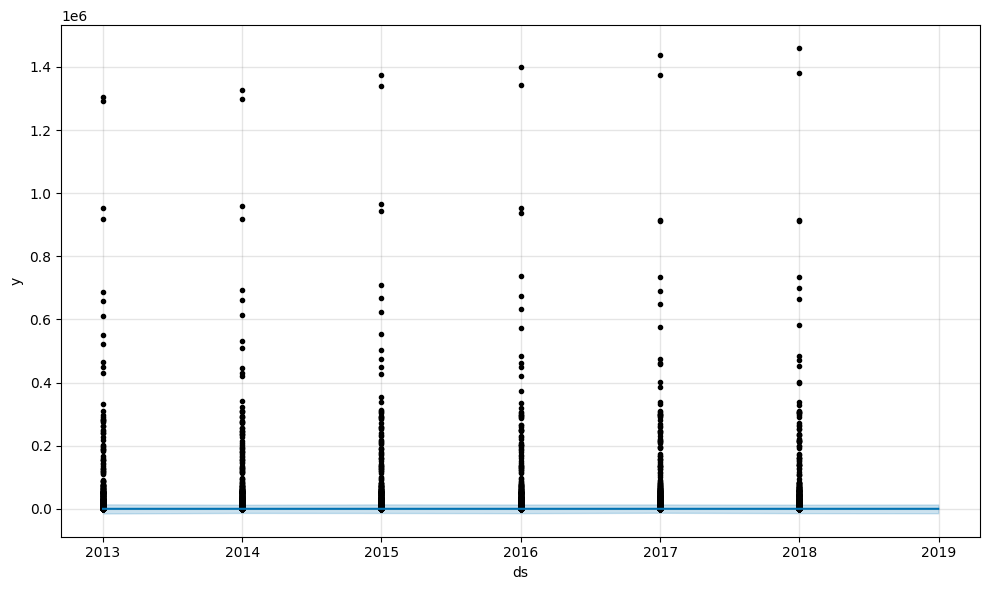

In [ ]:
plot1 = m.plot(forecast)

## Failed: Reason
Although our initial idea was to predict death counts for 2019 based on the data from 2013-2018 thinking this as a forecasting problem.
After modeling we see that the actual_deaths_2019 is 39631074, but our predicted deaths for 2019 is very low - which is beacuse our dataset doesn't have any seasonality trends and there is no dependencies over time.

# Challenges and Obstacles Faced



*   Data set merging: Combining the causes dataset was difficult as the causes dataframe did not have many codes in comparison to the mortality dataframe. This required looking outside the initial dataframe and finding different WHO cause codes and updating the causes dataframe to ensure we had enough data.
*   Modeling Limitations: Due to the low amount of features in our dataset, it was difficult to model our data for a specific target value. We also attempted to use time series forecasting to model our target value, however, the features of our dataframe do not follow a pattern based on time so our data could not be correctly forecasted. Due to this, we chose to focus on determining feature importance across a variety of models.






# Potential Next Steps



*   We could look into finding biometric mortality data such as height, weight, muscle mass, genetic inclinations to increase the number of features within our dataset to better model and to get more insightful predictions.
*   We will have to find and collect more time dependent and seasonal data, in order to use time series to predict death counts for the future years.

